## SUPERMARKET CUSTOMER DATA ANALYSIS

* **Name : Alfian Abdul Ghaffar**
* **Class : Job Conenctor Data Science**

## `1. Background`

It is a necessity for every business to know their market segmentation about their product. A good knowledge of their products is very important to make the business process of the company can run well. There are some methods to analyze the market segmentation some of the methods by involve understanding customer behavior and understanding customer needs. So, by analyzing the data from Supermarket Customers, hopefully we can make a good marketing strategy to increase product sales in reach the sales target.

## `2. Problem Statement`

The company want to research about **the market segmentation about their products, some steps need to do is by identifying :**
1. **Market products and services**
* What products have the highest and lowest sales rate?

2. **Reviewing customer segmentation based on what products they buy**
* What category of Age, Marital_Status, Education, Income, Kidhome, Teenhome that have high relation with the amount spend of products?
* Recognize of what customer needs and demands from each category (Age, Marital_Status, Education, Income)?
* Collecting the relevant demographic information about your potential customers, such as age, income, education, marital status, customer children?

3. **Analyze the supermarket campaign effectiveness related to sales rate**
* How effective the number of campaign received by customers with the level of sales rate of products?
* How effective each campaign bacth to each product category revenue?

4. **Analyze the best place to sell the product**
* Which sales place is the best and get many product purchases?
* What categories of customers predominantly make purchases at certain places?
* What categories of goods are predominantly purchased at certain places?

5. **Analysis conclusion**

As a data analyst, we will try to answers some points above.


## `3. Limitation`

* Using Supermarket Data the data from year July 2012 to June 2014
* Age count from the last year customer join the supermarket member

## `4. Data`

To answer the question above, we will analyze the supermarket customer data that has been collected before. The dataset can be accessed [click here](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK?usp=share_link).

## `Setup Init`

In [582]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import statsmodels.api as sm
import phik
from phik.report import plot_correlation_matrix
from phik import report
import math
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, lognorm, kstest
import matplotlib.pyplot as plt
from matplotlib import lines, patches
from scipy.stats import shapiro, kstest, normaltest
from scipy.special import inv_boxcox
from flexitext import flexitext

import warnings
warnings.filterwarnings("ignore")

### Dataset Explanation

The **"Supermarket Customer"** Analytics dataset contains a description of the details a company's ideal supermarket customer data. This dataset contains 29 columns detailing customer habits and demographics. And each of these 29 columns is divided into 4 categories, below is the detail :

#### A. People
*	**ID**: Customer's unique identifier
*	**Year_Birth**: Customer's birth year
*	**Education**: Customer's education level
*	**Marital_Status**: Customer's marital status
*	**Income**: Customer's yearly household income
*	**Kidhome**: Number of children in customer's household
*	**Teenhome**: Number of teenagers in customer's household
*	**Dt_Customer**: Date of customer's enrollment with the company
*	**Recency**: Number of days since customer's last purchase
*	**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

#### B. Products
*	**MntWines**: Amount spent on wine in last 2 years
*	**MntFruits**: Amount spent on fruits in last 2 years
*	**MntMeatProducts**: Amount spent on meat in last 2 years
*	**MntFishProducts**: Amount spent on fish in last 2 years
*	**MntSweetProducts**: Amount spent on sweets in last 2 years
*	**MntGoldProds**: Amount spent on gold in last 2 years

#### C. Promotion
*	**NumDealsPurchases**: Number of purchases made with a discount
*	**AcceptedCmp1**: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
*	**AcceptedCmp2**: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
*	**AcceptedCmp3**: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
*	**AcceptedCmp4**: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
*	**AcceptedCmp5**: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
*	**Response**: 1 if the customer accepted the offer in the last campaign, 0 otherwise

#### D. Place
*	**NumWebPurchases**: Number of purchases made through the company’s website
*	**NumCatalogPurchases**: Number of purchases made using a catalog
*	**NumStorePurchases**: Number of purchases made directly in stores
*	**NumWebVisitsMonth**: Number of visits to the company’s website in the last month

We need to analysis data type of each columns, so we can do the correct analysis method for that data. Below is the list for each data type :

* **Numerical**
1. Discrete: Kidhome, Teenhome, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Recenc
2. Continue: Year_Birth, Age, Income

* **Categorical** 
1. Ordinal : Educational
2. Nominal : Marital_Status, Complain, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response
* **Datetime** : Dt_Customer


Here are 5 top rows and 5 bottom rows from "Supermarket Customer" dataset.

In [583]:
df = pd.read_csv(r'D:\Materi Python Notion\Modul 2\New File Capstone 2\clean_raw_data_ver1.csv')
display(df.head())

Unnamed: 0    ID  Year_Birth  Age Age_category      Education   
0           0  5524        1957   57   5. Elderly  2. Graduation  \
1           1  2174        1954   60   5. Elderly  2. Graduation   
2           2  4141        1965   49   5. Elderly  2. Graduation   
3           3  6182        1984   30     4. Adult  2. Graduation   
4           4  5324        1981   33     4. Adult         4. PhD   

  Marital_Status   Income  Income_category  Kidhome  ...  NumWebVisitsMonth   
0      2. Single  58138.0  3. Upper-Middle        0  ...                  7  \
1      2. Single  46344.0  2. Lower-Middle        1  ...                  5   
2     1. Married  71613.0         4. Upper        0  ...                  4   
3     1. Married  26646.0         1. Lower        1  ...                  6   
4     1. Married  58293.0  3. Upper-Middle        1  ...                  5   

  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   
0            0             0             0             0             0  \
1            0             0             0             0             0   
2            0             0             0             0             0   
3            0             0             0             0             0   
4            0             0             0             0             0   

   TotalAcceptedCmp  campaignAccept  Complain  Response  
0                 1          Accept         0         1  
1                 0      Not Accept         0         0  
2                 0      Not Accept         0         0  
3                 0      Not Accept         0         0  
4                 0      Not Accept         0         0  

[5 rows x 34 columns]

In [584]:
# Performs checks for each columns summaries

display(df.describe(), df.describe(include='object'))

Unnamed: 0            ID   Year_Birth          Age         Income   
count  2240.000000   2240.000000  2240.000000  2240.000000    2240.000000  \
mean   1119.500000   5594.962054  1968.899554    45.100446   51625.563393   
std     646.776623   3244.541567    11.698238    11.698238   20584.067320   
min       0.000000      1.000000  1940.000000    18.000000    1730.000000   
25%     559.750000   2830.500000  1959.000000    37.000000   35538.750000   
50%    1119.500000   5468.000000  1970.000000    44.000000   51395.250000   
75%    1679.250000   8427.750000  1977.000000    55.000000   68117.250000   
max    2239.000000  11191.000000  1996.000000    74.000000  113734.000000   

           Kidhome     Teenhome      Recency     MntWines    MntFruits  ...   
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  ...  \
mean      0.444196     0.506250    49.109375   303.935714    26.302232  ...   
std       0.538398     0.544538    28.962453   336.597393    39.773434  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000    24.000000    23.750000     1.000000  ...   
50%       0.000000     0.000000    49.000000   173.500000     8.000000  ...   
75%       1.000000     1.000000    74.000000   504.250000    33.000000  ...   
max       2.000000     2.000000    99.000000  1493.000000   199.000000  ...   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4   
count        2240.000000        2240.000000   2240.000000   2240.000000  \
mean            5.790179           5.316518      0.072768      0.074554   
std             3.250958           2.426645      0.259813      0.262728   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  TotalAcceptedCmp   
count   2240.000000   2240.000000   2240.000000       2240.000000  \
mean       0.072768      0.064286      0.013393          0.446875   
std        0.259813      0.245316      0.114976          0.890543   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      0.000000          0.000000   
50%        0.000000      0.000000      0.000000          0.000000   
75%        0.000000      0.000000      0.000000          1.000000   
max        1.000000      1.000000      1.000000          5.000000   

          Complain     Response  
count  2240.000000  2240.000000  
mean      0.009375     0.149107  
std       0.096391     0.356274  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 28 columns]

Age_category      Education Marital_Status Income_category Dt_Customer   
count          2240           2240           2240            2240        2240  \
unique            4              4              4               4         663   
top        4. Adult  2. Graduation     1. Married        4. Upper  2012-08-31   
freq           1146           1127           1444             583          12   

       campaignAccept  
count            2240  
unique              2  
top        Not Accept  
freq             1631

In [585]:
print(f'The number of rows and columns : {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

The number of rows and columns : (2240, 34)


feature data_type  null_value  neg_value  n_unique   
0            Unnamed: 0     int64         0.0      False      2240  \
1                    ID     int64         0.0      False      2240   
2            Year_Birth     int64         0.0      False        56   
3                   Age     int64         0.0      False        56   
4          Age_category    object         0.0      False         4   
5             Education    object         0.0      False         4   
6        Marital_Status    object         0.0      False         4   
7                Income   float64         0.0      False      1973   
8       Income_category    object         0.0      False         4   
9               Kidhome     int64         0.0      False         3   
10             Teenhome     int64         0.0      False         3   
11          Dt_Customer    object         0.0      False       663   
12              Recency     int64         0.0      False       100   
13             MntWines     int64         0.0      False       776   
14            MntFruits     int64         0.0      False       158   
15      MntMeatProducts     int64         0.0      False       558   
16      MntFishProducts     int64         0.0      False       182   
17     MntSweetProducts     int64         0.0      False       177   
18         MntGoldProds     int64         0.0      False       213   
19             TotalMnt     int64         0.0      False      1054   
20    NumDealsPurchases     int64         0.0      False        15   
21      NumWebPurchases     int64         0.0      False        15   
22  NumCatalogPurchases     int64         0.0      False        14   
23    NumStorePurchases     int64         0.0      False        14   
24    NumWebVisitsMonth     int64         0.0      False        16   
25         AcceptedCmp3     int64         0.0      False         2   
26         AcceptedCmp4     int64         0.0      False         2   
27         AcceptedCmp5     int64         0.0      False         2   
28         AcceptedCmp1     int64         0.0      False         2   
29         AcceptedCmp2     int64         0.0      False         2   
30     TotalAcceptedCmp     int64         0.0      False         6   
31       campaignAccept    object         0.0      False         2   
32             Complain     int64         0.0      False         2   
33             Response     int64         0.0      False         2   

                                        sample_unique  
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
1   [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...  
2   [1957, 1954, 1965, 1984, 1981, 1967, 1971, 198...  
3   [57, 60, 49, 30, 33, 47, 43, 29, 40, 64, 31, 3...  
4          [5. Elderly, 4. Adult, 6. Old, 3. Teenage]  
5        [2. Graduation, 4. PhD, 3. Master, 1. Basic]  
6      [2. Single, 1. Married, 3. Divorced, 4. Widow]  
7   [58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...  
8   [3. Upper-Middle, 2. Lower-Middle, 4. Upper, 1...  
9                                           [0, 1, 2]  
10                                          [0, 1, 2]  
11  [2012-09-04, 2014-03-08, 2013-08-21, 2014-02-1...  
12  [58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8...  
13  [635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6...  
14  [88, 1, 49, 4, 43, 42, 65, 10, 0, 5, 16, 61, 2...  
15  [546, 6, 127, 20, 118, 98, 164, 56, 24, 11, 48...  
16  [172, 2, 111, 10, 46, 0, 50, 3, 1, 11, 225, 6,...  
17  [88, 1, 21, 3, 27, 42, 49, 2, 112, 5, 68, 13, ...  
18  [88, 6, 42, 5, 15, 14, 27, 23, 2, 13, 1, 16, 3...  
19  [1617, 27, 776, 53, 422, 716, 590, 169, 46, 49...  
20  [3, 2, 1, 5, 4, 15, 7, 0, 6, 9, 12, 8, 10, 13,...  
21  [8, 1, 2, 5, 6, 7, 4, 3, 11, 0, 27, 10, 9, 23,...  
22     [10, 1, 2, 0, 3, 4, 6, 28, 9, 5, 8, 7, 11, 22]  
23     [4, 2, 10, 6, 7, 0, 3, 8, 5, 12, 9, 13, 11, 1]  
24  [7, 5, 4, 6, 8, 9, 20, 2, 3, 1, 10, 0, 14, 19,...  
25                                             [0, 1]  
26                                             [0, 1]

### `Correlation and Signification of Customer Category and Amount Spend Products`

We Need to check the correlation and significance of each column as considerations for continuation process of data analysis,
Due to there are some outliers from the column with Numerical Discrete data, need to create grouping for each column using MAD.
(Grouping Process in on another notebook file)

In [586]:
dfCorr = pd.read_csv(r'D:\Materi Python Notion\Modul 2\New File Capstone 2\raw_data_corr.csv')
display(dfCorr.head(),dfCorr.tail())

Unnamed: 0    ID  Year_Birth  Age Age_category      Education   
0           0  5524        1957   57   5. Elderly  2. Graduation  \
1           1  2174        1954   60   5. Elderly  2. Graduation   
2           2  4141        1965   49   5. Elderly  2. Graduation   
3           3  6182        1984   30     4. Adult  2. Graduation   
4           4  5324        1981   33     4. Adult         4. PhD   

  Marital_Status   Income  Income_category  Kidhome  ...   
0      2. Single  58138.0  3. Upper-Middle        0  ...  \
1      2. Single  46344.0  2. Lower-Middle        1  ...   
2     1. Married  71613.0         4. Upper        0  ...   
3     1. Married  26646.0         1. Lower        1  ...   
4     1. Married  58293.0  3. Upper-Middle        1  ...   

                       MntMeat_Cat                      MntFish_Cat   
0       High Meat Amount Purchases            High Amount Purchases  \
1             Low Amount Purchases             Low Amount Purchases   
2  Medium to High Amount Purchases            High Amount Purchases   
3   Medium to Low Amount Purchases   Medium to Low Amount Purchases   
4  Medium to High Amount Purchases  Medium to High Amount Purchases   

                      MntSweet_Cat                      MntGold_Cat   
0            High Amount Purchases            High Amount Purchases  \
1             Low Amount Purchases             Low Amount Purchases   
2  Medium to High Amount Purchases  Medium to High Amount Purchases   
3   Medium to Low Amount Purchases             Low Amount Purchases   
4  Medium to High Amount Purchases   Medium to Low Amount Purchases   

                       NumDeal_Cat                      NumWeb_Cat   
0  Medium to High Number Purchases           High Number Purchases  \
1   Medium to Low Number Purchases            Low Number Purchases   
2             Low Number Purchases           High Number Purchases   
3   Medium to Low Number Purchases  Medium to Low Number Purchases   
4            High Number Purchases           High Number Purchases   

                    NumCatalog_Cat                     NumStore_Cat   
0            High Number Purchases   Medium to Low Number Purchases  \
1   Medium to Low Number Purchases             Low Number Purchases   
2   Medium to Low Number Purchases            High Number Purchases   
3             Low Number Purchases   Medium to Low Number Purchases   
4  Medium to High Number Purchases  Medium to High Number Purchases   

               NumWebVIsit_Cat                           TotalMnt_Cat  
0  Medium to High Number Visit            High Number of Total Amount  
1   Medium to Low Number Visit             Low Number of Total Amount  
2   Medium to Low Number Visit  Medium to High Number of Total Amount  
3   Medium to Low Number Visit             Low Number of Total Amount  
4   Medium to Low Number Visit  Medium to High Number of Total Amount  

[5 rows x 46 columns]

Unnamed: 0     ID  Year_Birth  Age Age_category      Education   
2235        2235  10870        1967   47   5. Elderly  2. Graduation  \
2236        2236   4001        1946   68       6. Old         4. PhD   
2237        2237   7270        1981   33     4. Adult  2. Graduation   
2238        2238   8235        1956   58   5. Elderly      3. Master   
2239        2239   9405        1954   60   5. Elderly         4. PhD   

     Marital_Status   Income  Income_category  Kidhome  ...   
2235     1. Married  61223.0  3. Upper-Middle        0  ...  \
2236     1. Married  64014.0  3. Upper-Middle        2  ...   
2237    3. Divorced  56981.0  3. Upper-Middle        0  ...   
2238     1. Married  69245.0         4. Upper        0  ...   
2239     1. Married  52869.0  3. Upper-Middle        1  ...   

                          MntMeat_Cat                      MntFish_Cat   
2235  Medium to High Amount Purchases  Medium to High Amount Purchases  \
2236   Medium to Low Amount Purchases             Low Amount Purchases   
2237  Medium to High Amount Purchases  Medium to High Amount Purchases   
2238  Medium to High Amount Purchases            High Amount Purchases   
2239   Medium to Low Amount Purchases             Low Amount Purchases   

                         MntSweet_Cat                     MntGold_Cat   
2235            High Amount Purchases           High Amount Purchases  \
2236             Low Amount Purchases            Low Amount Purchases   
2237  Medium to High Amount Purchases  Medium to Low Amount Purchases   
2238  Medium to High Amount Purchases           High Amount Purchases   
2239             Low Amount Purchases  Medium to Low Amount Purchases   

                          NumDeal_Cat                       NumWeb_Cat   
2235   Medium to Low Number Purchases            High Number Purchases  \
2236            High Number Purchases            High Number Purchases   
2237             Low Number Purchases   Medium to Low Number Purchases   
2238   Medium to Low Number Purchases            High Number Purchases   
2239  Medium to High Number Purchases  Medium to High Number Purchases   

                       NumCatalog_Cat                    NumStore_Cat   
2235  Medium to High Number Purchases  Medium to Low Number Purchases  \
2236   Medium to Low Number Purchases  Medium to Low Number Purchases   
2237  Medium to High Number Purchases           High Number Purchases   
2238            High Number Purchases           High Number Purchases   
2239   Medium to Low Number Purchases  Medium to Low Number Purchases   

                  NumWebVIsit_Cat                           TotalMnt_Cat  
2235   Medium to Low Number Visit            High Number of Total Amount  
2236  Medium to High Number Visit  Medium to High Number of Total Amount  
2237   Medium to Low Number Visit            High Number of Total Amount  
2238             Low Number Visit  Medium to High Number of Total Amount  
2239  Medium to High Number Visit   Medium to Low Number of Total Amount  

[5 rows x 46 columns]

In [587]:
print(f'The number of rows and columns : {dfCorr.shape}')

pd.DataFrame(
    {
    'feature': dfCorr.columns.values,
    'data_type': dfCorr.dtypes.values,
    'null_value': dfCorr.isna().mean().values * 100,
    'neg_value': [True if dfCorr[col].dtype == int and (dfCorr[col] < 0).any() else False for col in dfCorr.columns],
    'n_unique': dfCorr.nunique().values,
    'sample_unique': [dfCorr[col].unique() for col in dfCorr.columns]
    }
)

The number of rows and columns : (2240, 46)


feature data_type  null_value  neg_value  n_unique   
0            Unnamed: 0     int64         0.0      False      2240  \
1                    ID     int64         0.0      False      2240   
2            Year_Birth     int64         0.0      False        56   
3                   Age     int64         0.0      False        56   
4          Age_category    object         0.0      False         4   
5             Education    object         0.0      False         4   
6        Marital_Status    object         0.0      False         4   
7                Income   float64         0.0      False      1973   
8       Income_category    object         0.0      False         4   
9               Kidhome     int64         0.0      False         3   
10             Teenhome     int64         0.0      False         3   
11          Dt_Customer    object         0.0      False       663   
12              Recency     int64         0.0      False       100   
13             MntWines     int64         0.0      False       776   
14            MntFruits     int64         0.0      False       158   
15      MntMeatProducts     int64         0.0      False       558   
16      MntFishProducts     int64         0.0      False       182   
17     MntSweetProducts     int64         0.0      False       177   
18         MntGoldProds     int64         0.0      False       213   
19             TotalMnt     int64         0.0      False      1054   
20    NumDealsPurchases     int64         0.0      False        15   
21      NumWebPurchases     int64         0.0      False        15   
22  NumCatalogPurchases     int64         0.0      False        14   
23    NumStorePurchases     int64         0.0      False        14   
24    NumWebVisitsMonth     int64         0.0      False        16   
25         AcceptedCmp3     int64         0.0      False         2   
26         AcceptedCmp4     int64         0.0      False         2   
27         AcceptedCmp5     int64         0.0      False         2   
28         AcceptedCmp1     int64         0.0      False         2   
29         AcceptedCmp2     int64         0.0      False         2   
30     TotalAcceptedCmp     int64         0.0      False         6   
31       campaignAccept    object         0.0      False         2   
32             Complain     int64         0.0      False         2   
33             Response     int64         0.0      False         2   
34         MntWines_Cat    object         0.0      False         4   
35        MntFruits_Cat    object         0.0      False         4   
36          MntMeat_Cat    object         0.0      False         4   
37          MntFish_Cat    object         0.0      False         4   
38         MntSweet_Cat    object         0.0      False         4   
39          MntGold_Cat    object         0.0      False         4   
40          NumDeal_Cat    object         0.0      False         4   
41           NumWeb_Cat    object         0.0      False         4   
42       NumCatalog_Cat    object         0.0      False         4   
43         NumStore_Cat    object         0.0      False         4   
44      NumWebVIsit_Cat    object         0.0      False         4   
45         TotalMnt_Cat    object         0.0      False         4   

                                        sample_unique  
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
1   [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177...  
2   [1957, 1954, 1965, 1984, 1981, 1967, 1971, 198...  
3   [57, 60, 49, 30, 33, 47, 43, 29, 40, 64, 31, 3...  
4          [5. Elderly, 4. Adult, 6. Old, 3. Teenage]  
5        [2. Graduation, 4. PhD, 3. Master, 1. Basic]  
6      [2. Single, 1. Married, 3. Divorced, 4. Widow]  
7   [58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...  
8   [3. Upper-Middle, 2. Lower-Middle, 4. Upper, 1...  
9                                           [0, 1, 2]  
10                                          [0, 1, 2]  
11  [2012-09-04, 2014-03-08, 2013-08-21, 2014-02-1...

interval columns not set, guessing: ['Kidhome', 'Teenhome']


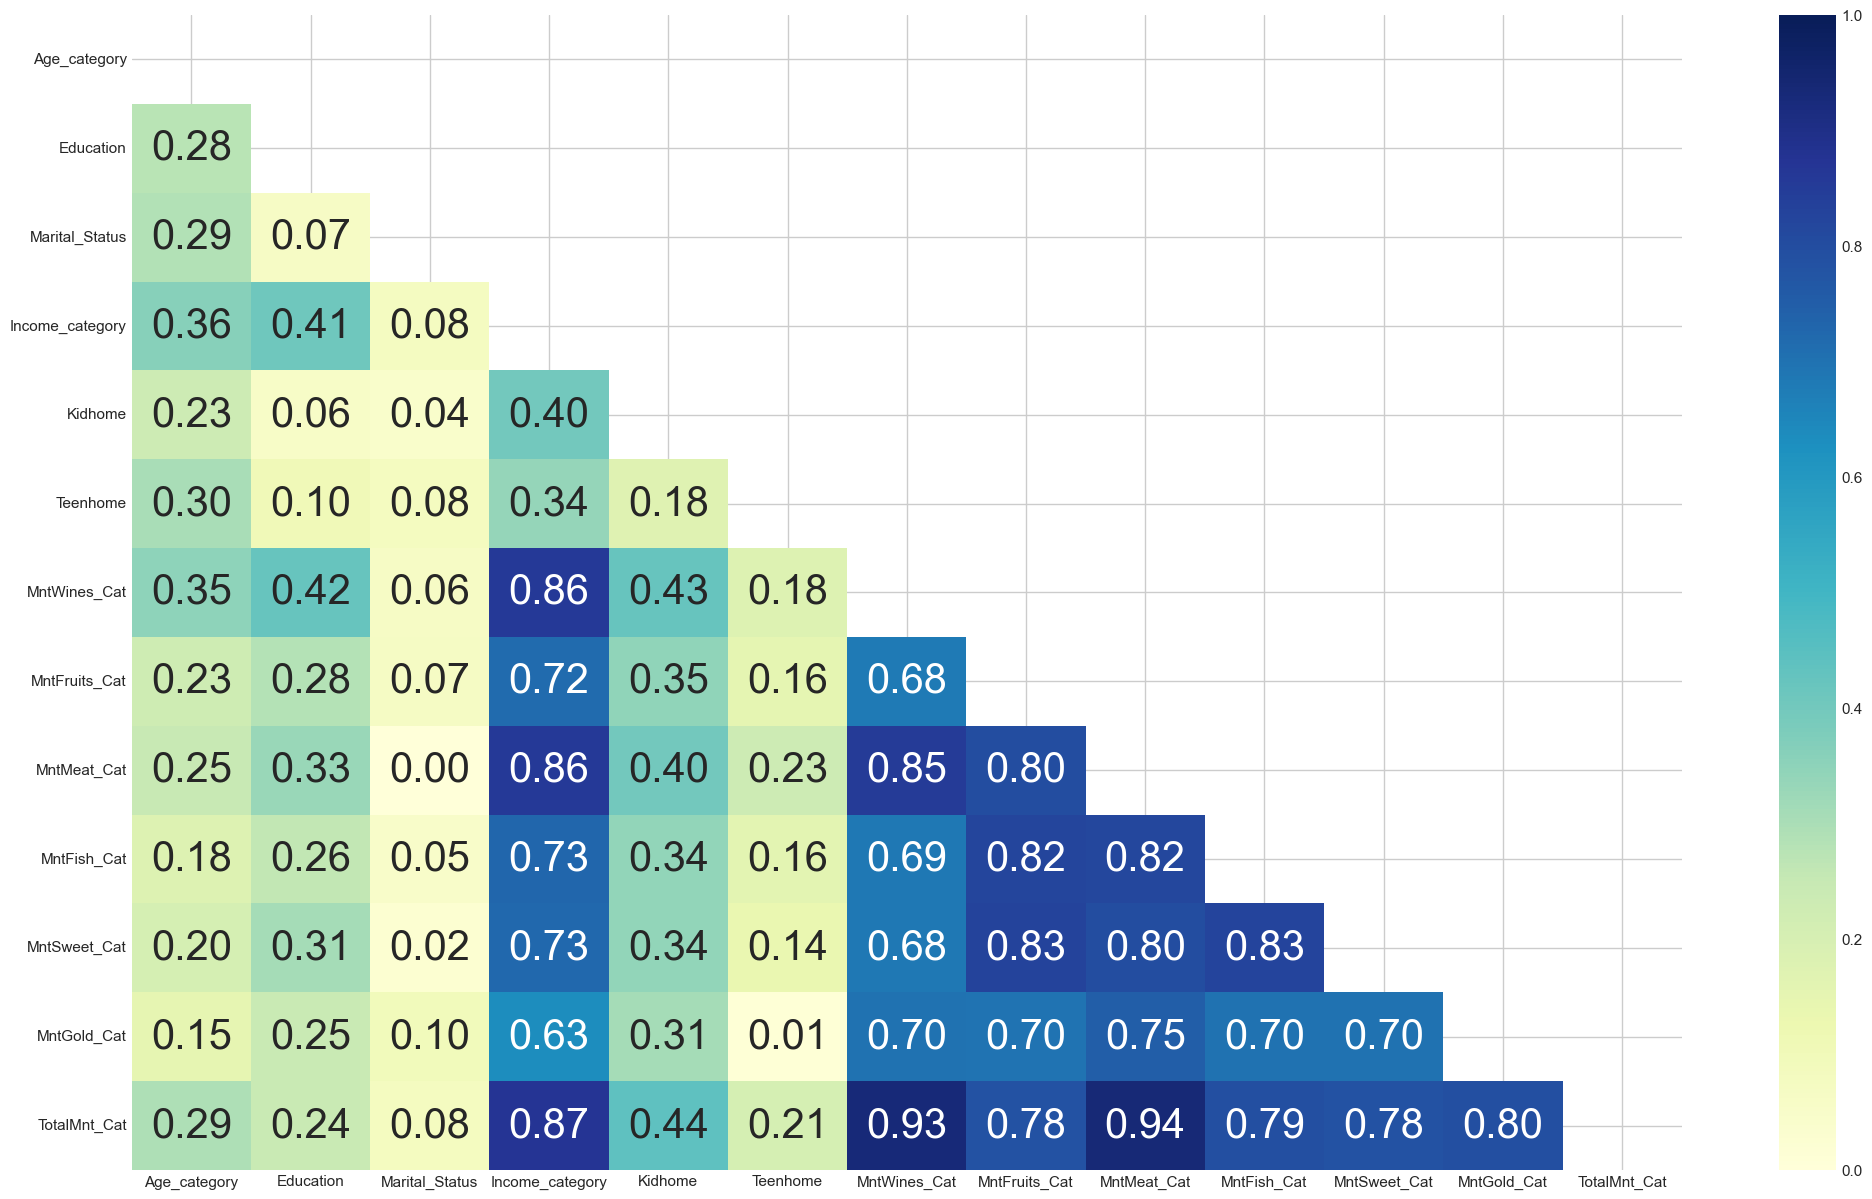

interval columns not set, guessing: ['Kidhome', 'Teenhome']


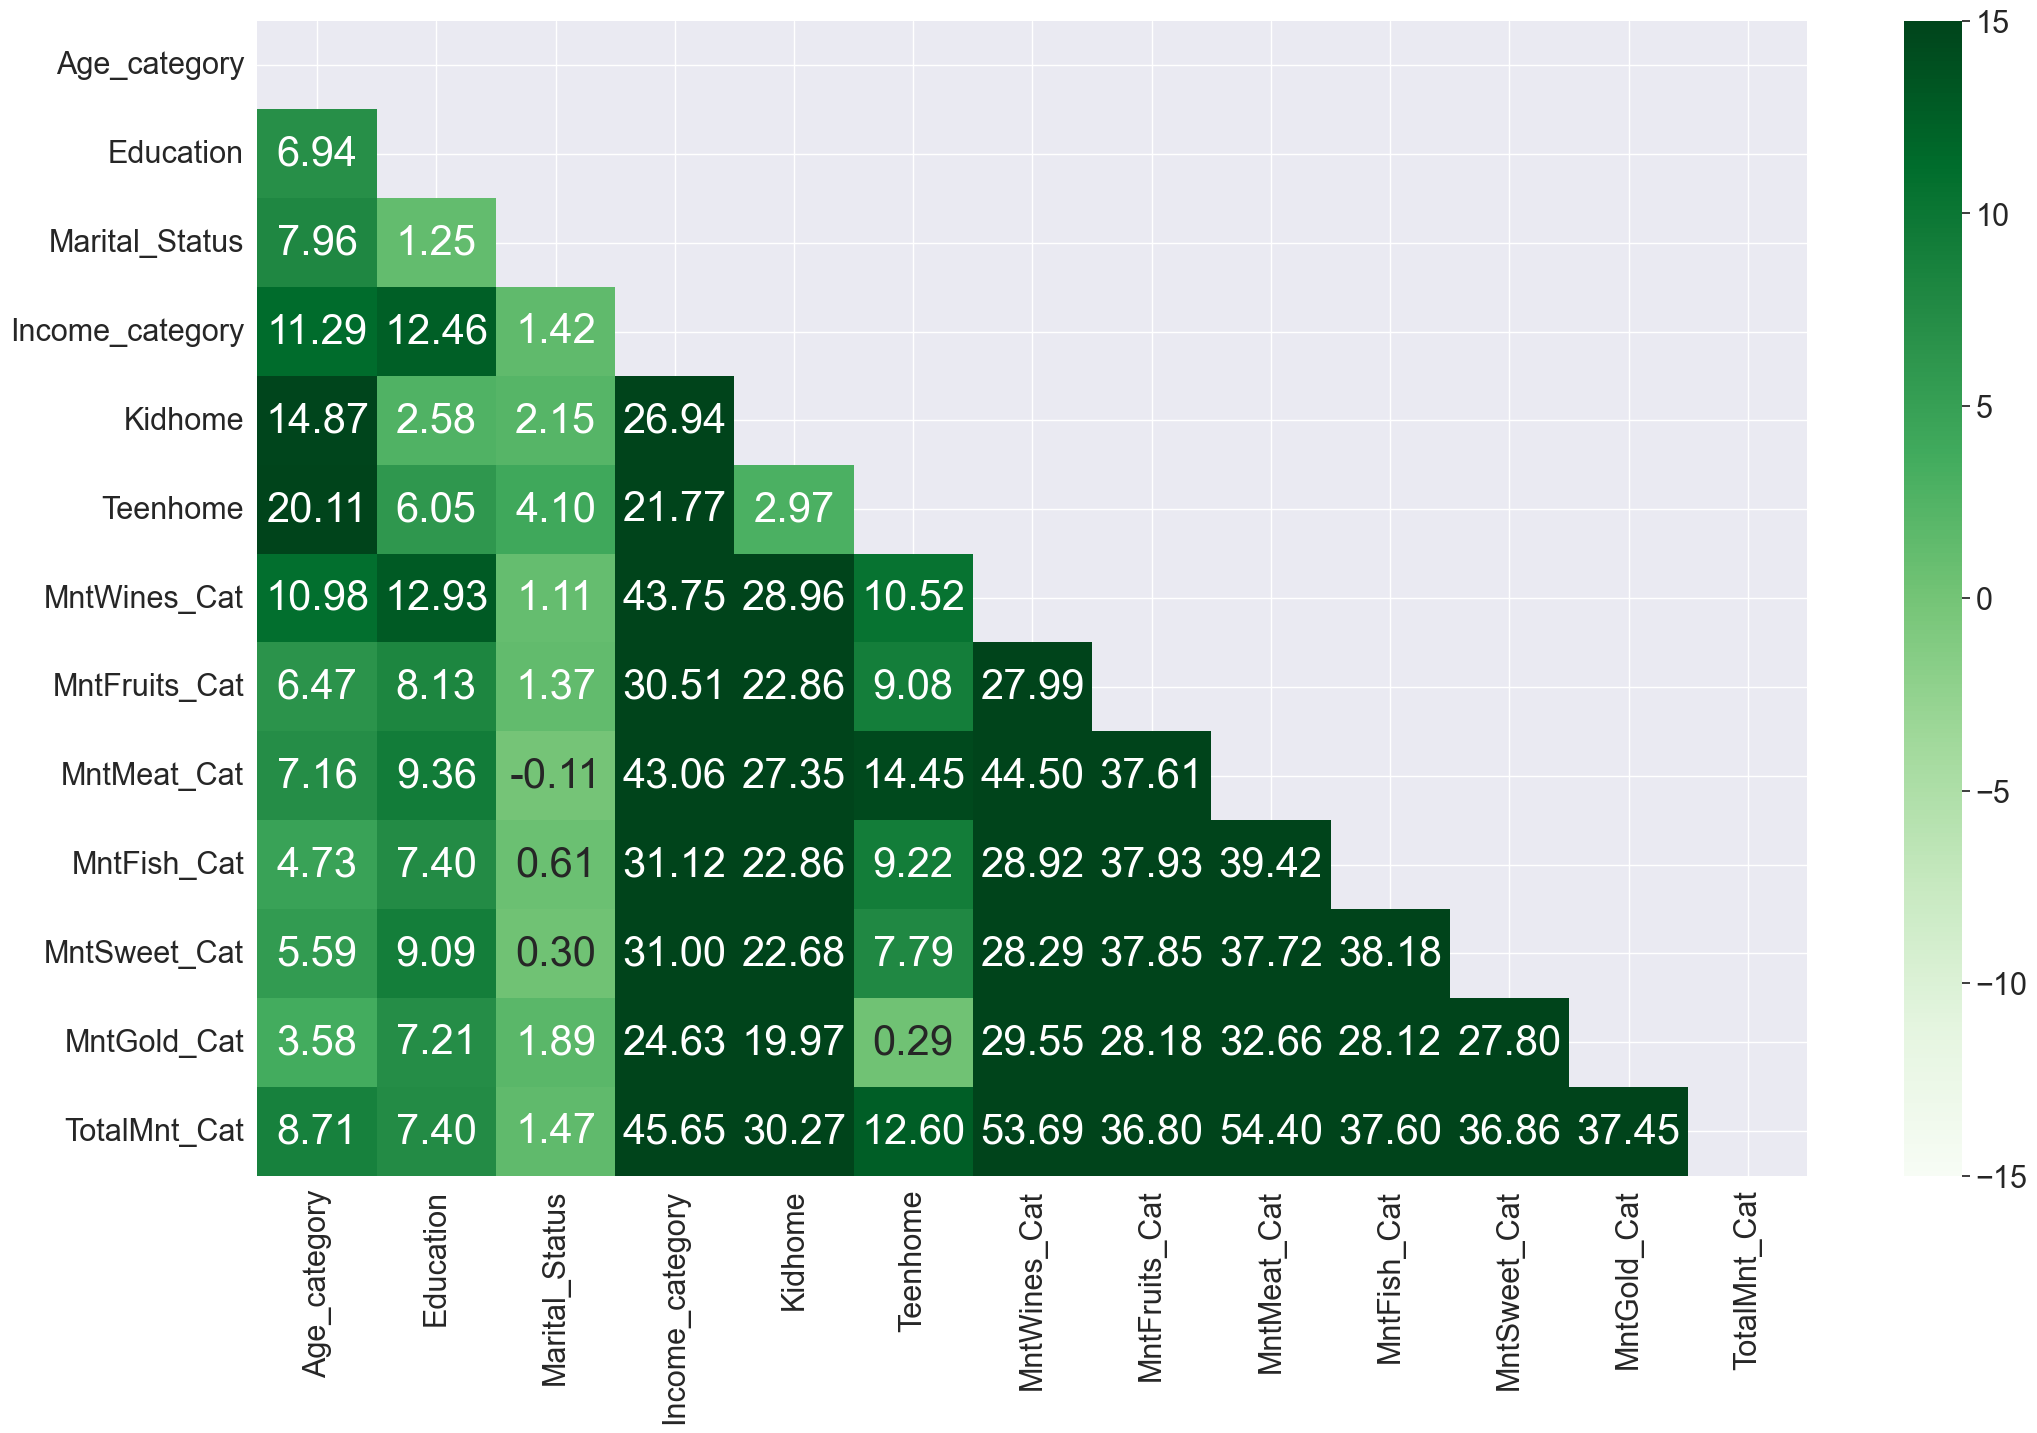

In [588]:
# Check the correlation and signification

# separating the column that we need beetween customer category, product amount and place
dfCorrMap = dfCorr[['Age_category','Education','Marital_Status','Income_category','Kidhome','Teenhome','MntWines_Cat','MntFruits_Cat','MntMeat_Cat','MntFish_Cat','MntSweet_Cat','MntGold_Cat', 'TotalMnt_Cat']]
# heatmap of variable correlation 
fig, ax = plt.subplots(figsize=(25, 15))
phik_overview = dfCorrMap.phik_matrix()
corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"fontsize":30})
sns.set(font_scale=2)
plt.show()

# heatmap of variable significance
fig, ax = plt.subplots(figsize=(25, 15))
significance_overview = dfCorrMap.significance_matrix()
corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f', annot_kws={"fontsize":30})
sns.set(font_scale=2)
plt.show()

Based on the Correlation and Signification check between the customer category and the amount of products above, have some insight that may will be use as consideration on the next step data analysis, there are :

1. Age_Category have an correlation and significance to the Amount Spent of Product, but both **correlation and significance obtained are not too high.**
2. Education have an correlation and significance to the Amount Spent of Product, but both **correlation and significance obtained are not too high.**
3. Income_Category have an **the highest correlation and significance** to the Amount Spent of Products in all products.
4. Marital_Status have an **lowest correlation and significance** to the Amount Spent of Product.
5. The number of Kidhome have an correlation and significance to the Amount Spent of Product, and the **correlation and significance is quite high for all products.**
6. The number of Teenhone have an correlation and significance to the Amount Spent of Product, and the **correlation and significance looks more prominent on wines and meat products.**

## `Market Product And Customer Segmentation Based on Amount Spend of Product`

In [589]:
avg = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean(axis=0)

fig = px.pie(values=avg.values, names=avg.index,  
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Average Amount Spent on Product Categories', title_x=0.5,
                  legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="right",
                      x=0.99
                  ))

1. The biggest (number 1) of customer spending is on **wine** takes **50,2%** on average, 
2. followed number 2 by **meat** at **27,6**% of spendings,
3. followed number 3 by **gold** at **7,27**% of spendings,
4. followed number 4 by **fish** at **6,19**% of spendings,
5. followed number 5 by **sweet** at **4,47**% of spendings,
6. the las number number 6 is by **fruits** at **4,34**% of spendings.


* From analyzing the total product sales from the supermarket data, It's possible that the product quality of **wine and meat** in this Supermarket have the highest product quality. This causes people's purchase of these two products (wine and meat) are very high compared to other products. This also has possibility that the society around this supermarket has a lifestyle with a high level of consumption of wine and meat products. It's a sales goal that must be maintained.
* While other products seem less desirable to buy the customer, has pecentage less than 10 % such as **gold, fish, sweet and fruits** products. This could be due to the following factors that must be improved :
1. Poor quality goods, for example that may the Supermarket sell thee rotten fish or withered fruits.
2. The products like gold, fish, sweet and fruits are not commodities in the country, so it's difficult to get and the prices are very expensive, people are reluctant to purchase.
3. Lack of effective promotion or marketing: If there is not enough effort to introduce or promote the item to the target market, consumers may not know about its existence or the features offered.

In [590]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
display(df.groupby('Age_category')[cols].agg('mean'),
        df.groupby('Marital_Status')[cols].agg('mean'),
        df.groupby('Income_category')[cols].agg('mean'),
        df.groupby('Education')[cols].agg('mean'),
        df.groupby('Kidhome')[cols].agg('mean'),
        df.groupby('Teenhome')[cols].agg('mean')
)

MntWines  MntFruits  MntMeatProducts  MntFishProducts   
Age_category                                                            
3. Teenage    291.824176  33.890110       241.945055        47.175824  \
4. Adult      256.236475  24.564572       153.293194        34.720768   
5. Elderly    348.774298  26.290497       167.390929        38.085313   
6. Old        488.935065  43.337662       276.272727        61.129870   

              MntSweetProducts  MntGoldProds  
Age_category                                  
3. Teenage           30.604396     51.593407  
4. Adult             25.849040     39.581152  
5. Elderly           26.906048     48.354212  
6. Old               42.831169     49.064935

MntWines  MntFruits  MntMeatProducts  MntFishProducts   
Marital_Status                                                            
1. Married      302.430748  25.580332       163.662742        36.831025  \
2. Single       288.106776  26.833676       181.141684        38.574949   
3. Divorced     324.844828  27.426724       150.206897        35.043103   
4. Widow        369.272727  33.090909       189.285714        51.389610   

                MntSweetProducts  MntGoldProds  
Marital_Status                                  
1. Married             26.468837     42.891967  
2. Single              27.051335     44.277207  
3. Divorced            26.818966     46.288793  
4. Widow               39.012987     56.766234

MntWines  MntFruits  MntMeatProducts  MntFishProducts   
Income_category                                                            
1. Lower          21.935714   5.910714        22.723214         8.633929  \
2. Lower-Middle  125.704918   8.098361        48.457195        13.690346   
3. Upper-Middle  437.372263  30.629562       158.839416        39.571168   
4. Upper         617.221269  58.963979       424.692967        85.799314   

                 MntSweetProducts  MntGoldProds  
Income_category                                  
1. Lower                 5.896429     16.828571  
2. Lower-Middle          8.593807     28.285974  
3. Upper-Middle         28.233577     58.541971  
4. Upper                63.686106     71.312178

MntWines  MntFruits  MntMeatProducts  MntFishProducts   
Education                                                                
1. Basic         7.240741  11.111111        11.444444        17.055556  \
2. Graduation  284.268855  30.774623       179.488909        43.149956   
3. Master      285.286213  24.240838       155.541012        37.549738   
4. PhD         404.495885  20.049383       168.602881        26.728395   

               MntSweetProducts  MntGoldProds  
Education                                      
1. Basic              12.111111     22.833333  
2. Graduation         31.367347     50.849157  
3. Master             25.808028     42.523560  
4. PhD                20.222222     32.310700

MntWines  MntFruits  MntMeatProducts  MntFishProducts   
Kidhome                                                            
0        451.173241  39.392885       253.996133        56.162413  \
1        104.403782   8.517241        48.862069        12.311457   
2         74.791667   6.770833        33.833333         7.729167   

         MntSweetProducts  MntGoldProds  
Kidhome                                  
0               40.498840     60.037123  
1                8.932147     22.408231  
2                4.708333     17.416667

MntWines  MntFruits  MntMeatProducts  MntFishProducts   
Teenhome                                                            
0         304.822971  33.310017       227.120035        48.658031  \
1         300.009709  18.866990       101.432039        25.697087   
2         361.942308  17.519231       124.769231        23.903846   

          MntSweetProducts  MntGoldProds  
Teenhome                                  
0                33.631261     45.256477  
1                20.233010     42.587379  
2                16.076923     44.942308

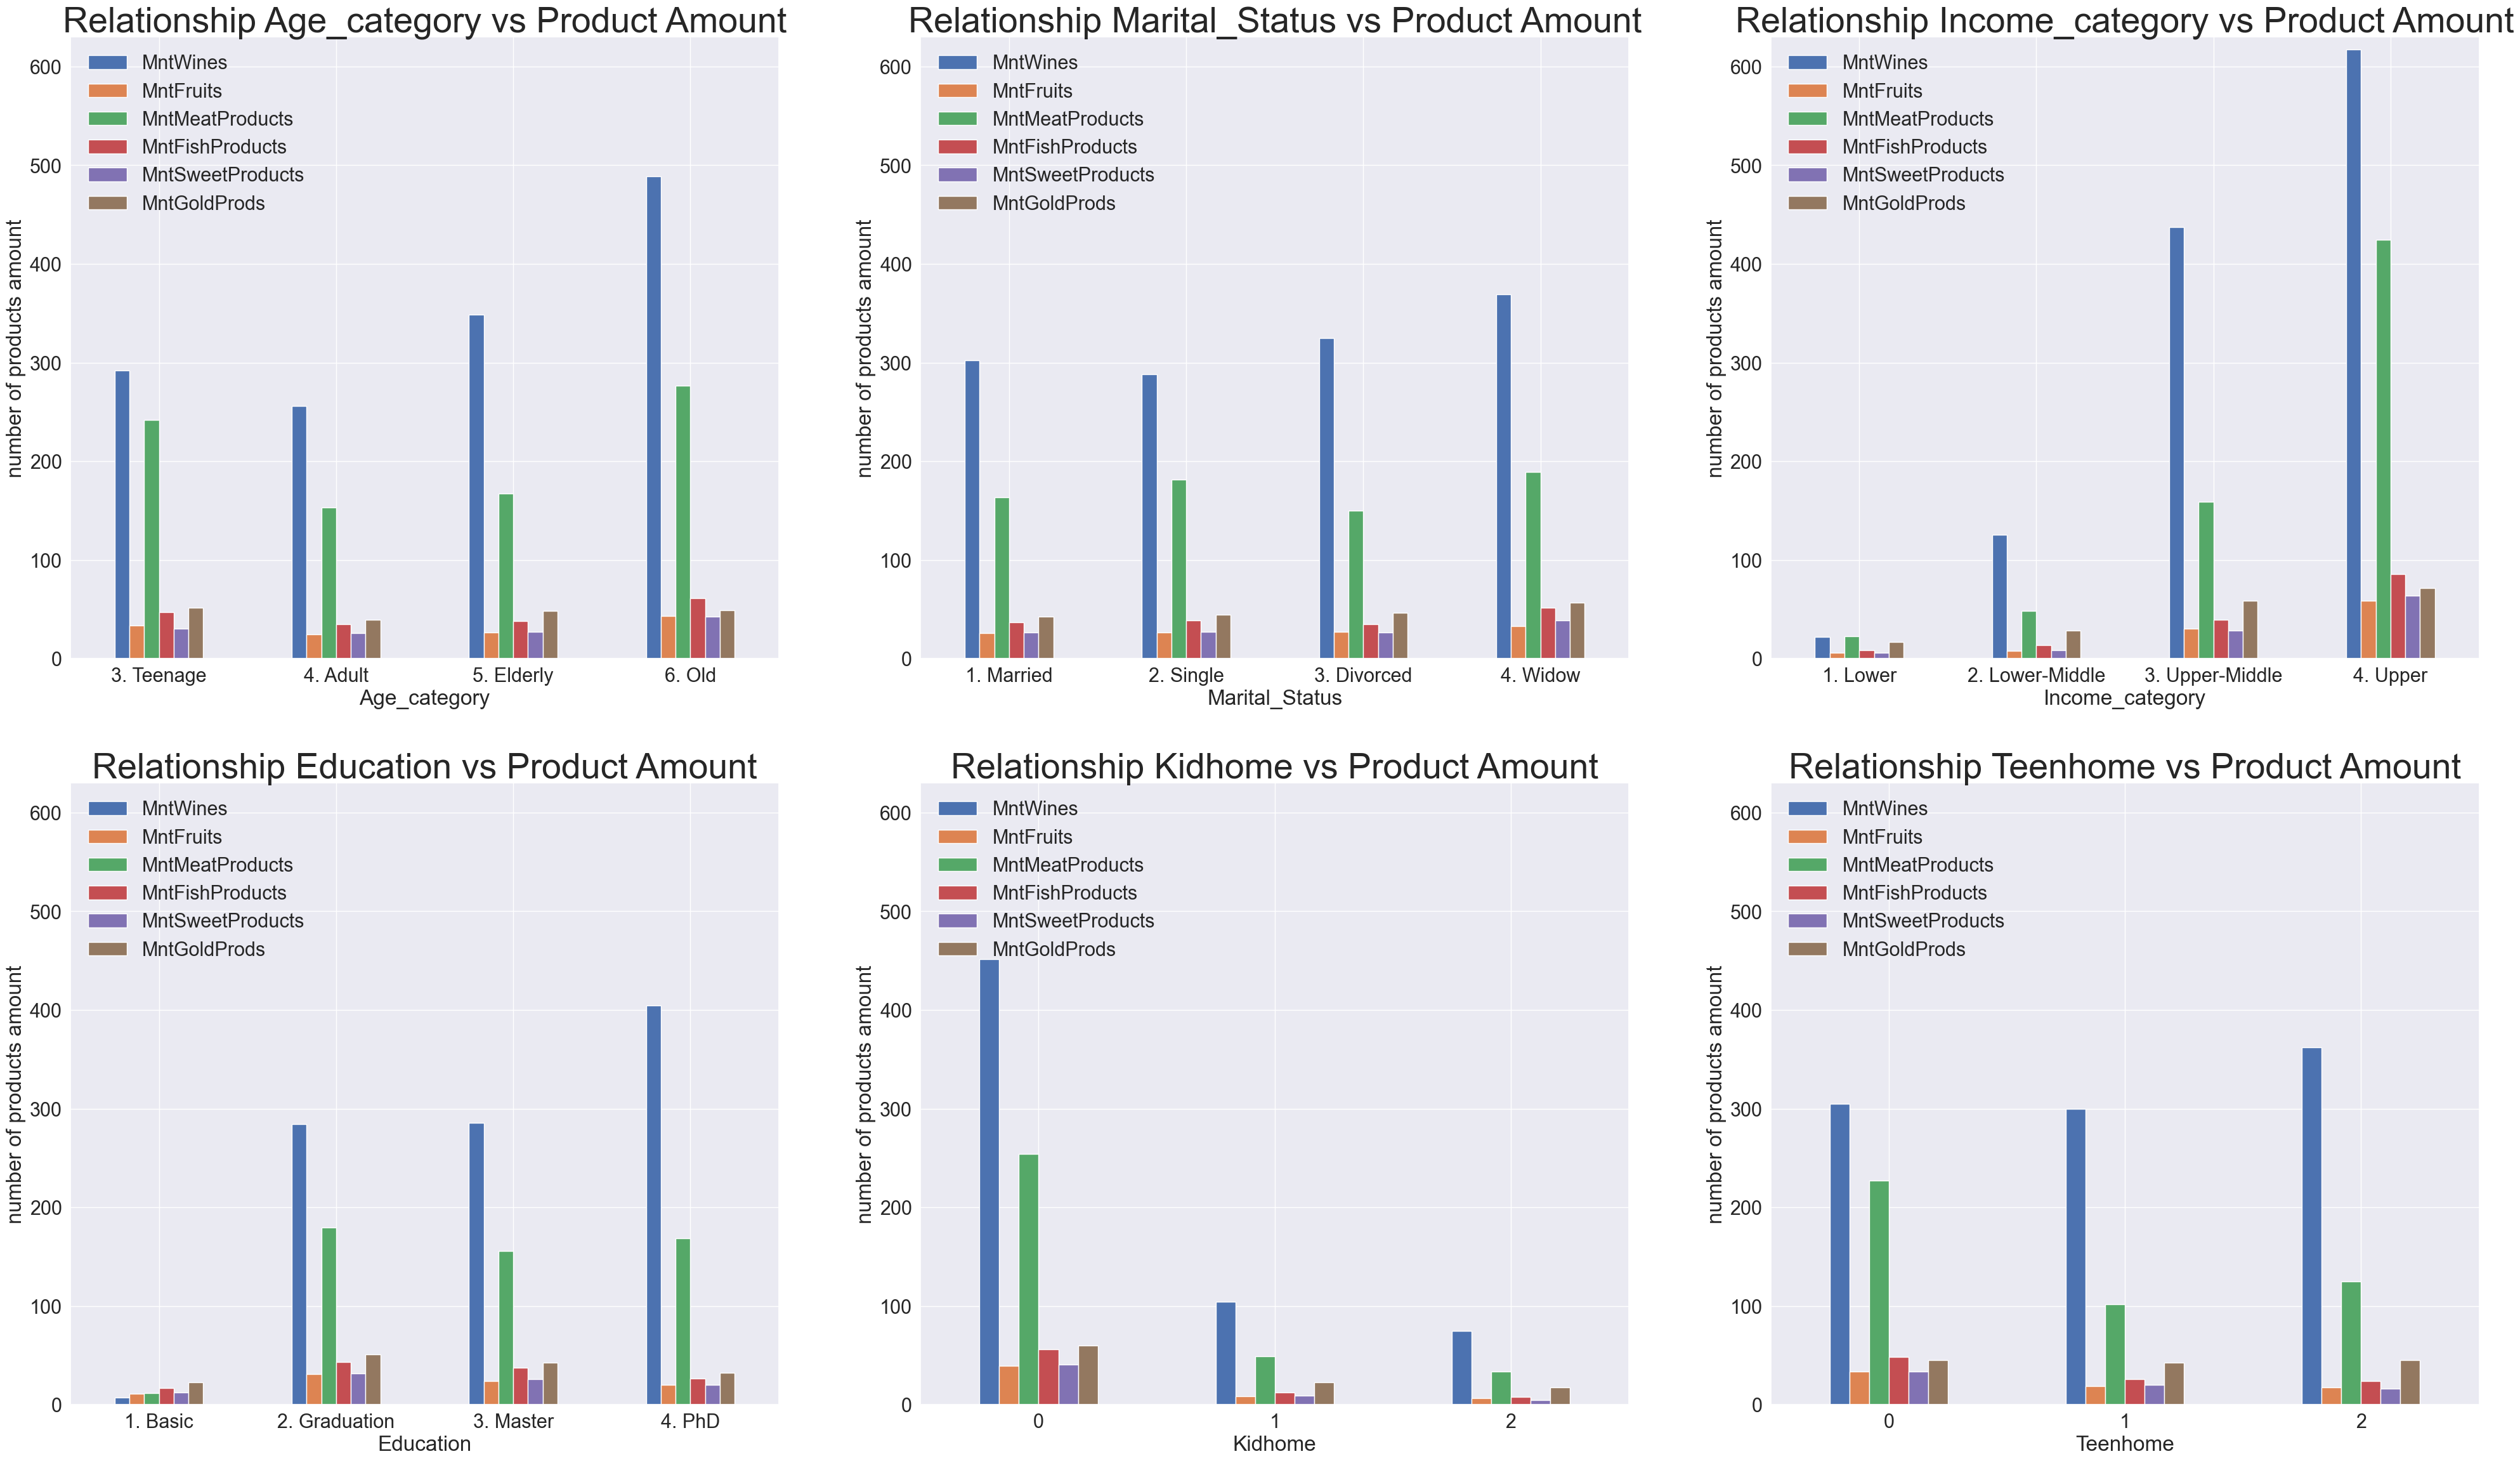

In [591]:
# plot based on categorical columns vs promotion columns
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(49,28))

axEach = [ax1,ax2,ax3]
axEach2 = [ax4,ax5,ax6]
colList = ['Age_category', 'Marital_Status', 'Income_category']
colList2 = ['Education', 'Kidhome', 'Teenhome']
titleEach = ['Relationship Age_category vs Product Amount', 'Relationship Marital_Status vs Product Amount', 'Relationship Income_category vs Product Amount']
titleEach2 = ['Relationship Education vs Product Amount', 'Relationship Kidhome vs Product Amount', 'Relationship Teenhome vs Product Amount']

for i in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # data
    df.groupby(i[2])[cols].agg('mean').plot(kind='bar', ax=i[0])
    df.groupby(i[3])[cols].agg('mean').plot(kind='bar', ax=i[1])
    # set title
    i[0].set_title(i[4], fontsize=40)
    i[1].set_title(i[5], fontsize=40)
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('number of products amount')
    i[1].set_ylabel('number of products amount')
    # set y limit
    i[0].set_ylim(bottom=0, top=630)
    i[1].set_ylim(bottom=0, top=630)
    # set legend
    i[0].legend(loc='upper left')
    i[1].legend(loc='upper left')

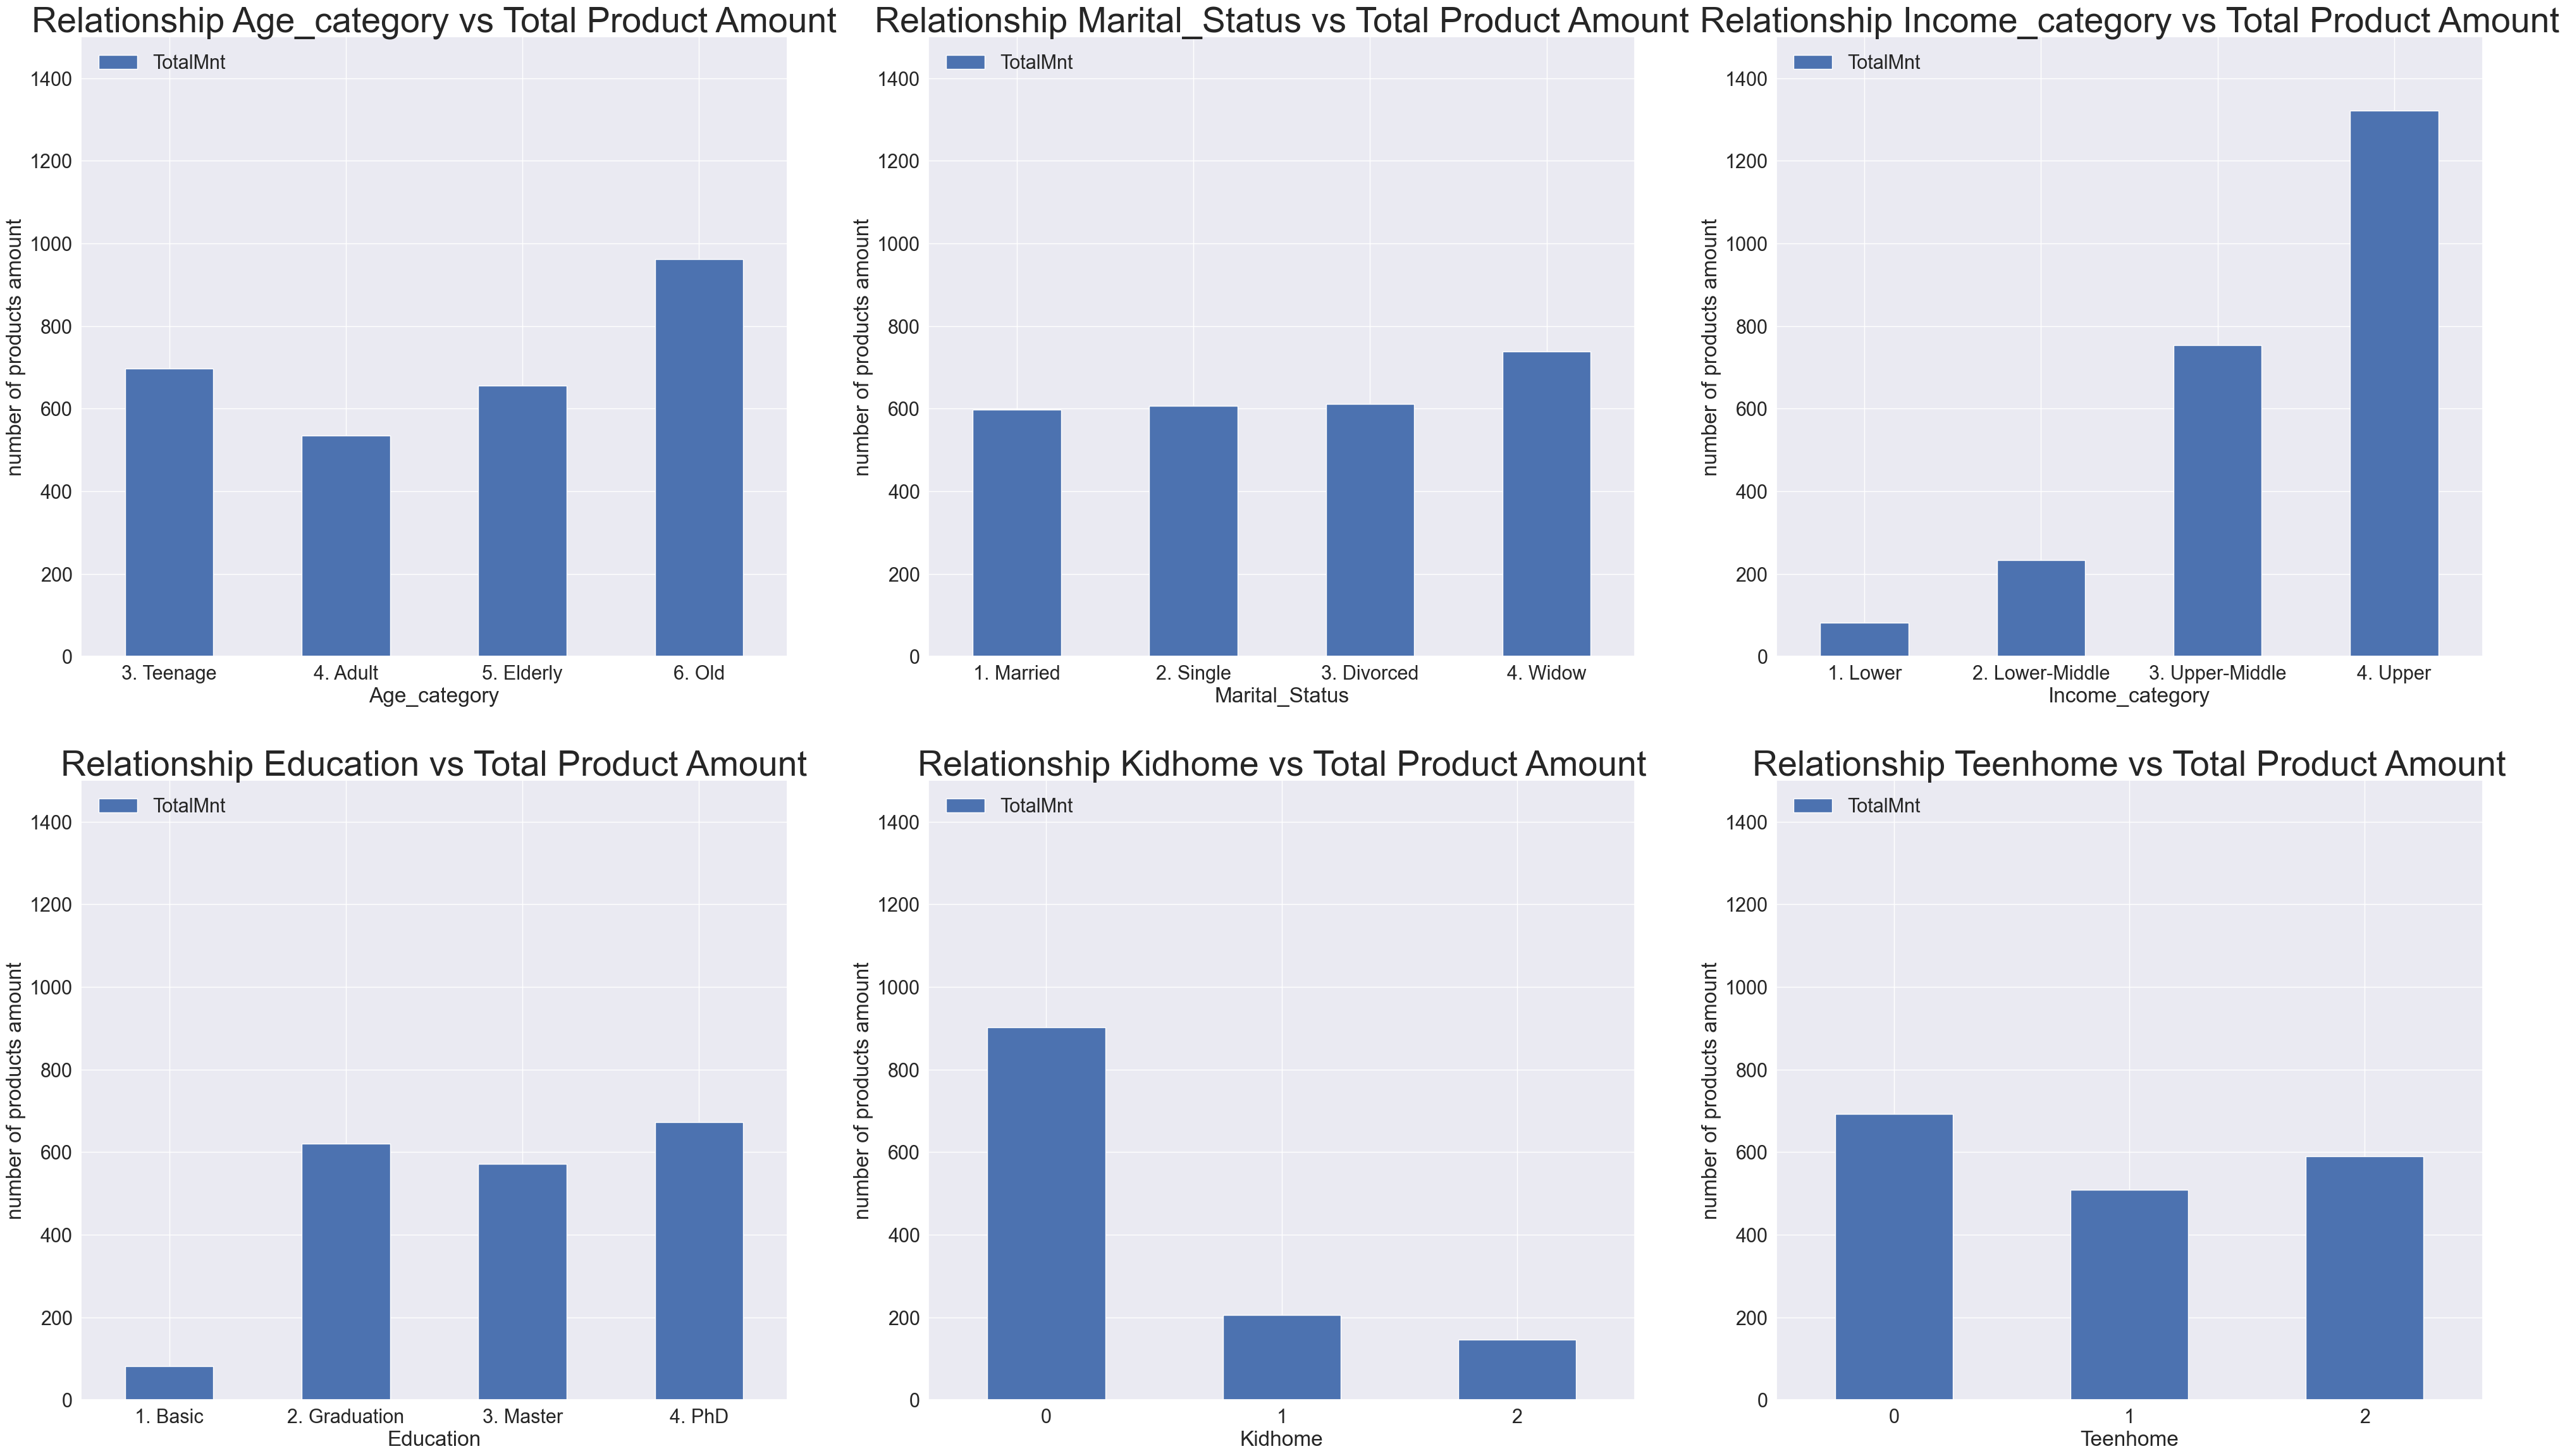

In [592]:
# plot based on categorical columns vs promotion columns
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(49,28))

axEach = [ax1,ax2,ax3]
axEach2 = [ax4,ax5,ax6]
colList = ['Age_category', 'Marital_Status', 'Income_category']
colList2 = ['Education', 'Kidhome', 'Teenhome']
titleEach = ['Relationship Age_category vs Total Product Amount', 'Relationship Marital_Status vs Total Product Amount', 'Relationship Income_category vs Total Product Amount']
titleEach2 = ['Relationship Education vs Total Product Amount', 'Relationship Kidhome vs Total Product Amount', 'Relationship Teenhome vs Total Product Amount']

for i in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # data
    df.groupby(i[2])['TotalMnt'].agg('mean').plot(kind='bar', ax=i[0])
    df.groupby(i[3])['TotalMnt'].agg('mean').plot(kind='bar', ax=i[1])
    # set title
    i[0].set_title(i[4], fontsize=40)
    i[1].set_title(i[5], fontsize=40)
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('number of products amount')
    i[1].set_ylabel('number of products amount')
    # set y limit
    i[0].set_ylim(bottom=0, top=1500)
    i[1].set_ylim(bottom=0, top=1500)
    # set legend
    i[0].legend(loc='upper left')
    i[1].legend(loc='upper left')

From the Histogram Graphic above some insight that can get are :

1. **Relationship Age_category vs Product Amount** : Based on check with table, barplot, correlation and significance, the relation of Age_category vs Product Amount is have but in low relation. There is a decrease in amount spending in the adult category, but the number is getting increase in category Elderly and Old.
2. **Relationship Marital_Status vs Product Amount** : Based on check with table, barplot, correlation and significance, the relation of Marital_Status vs Product Amount is very low. There are unrelated value in all category in Marital_Status with the number of amount spend purchase.
3. **Relationship Income_category vs Product Amount** : Based on check with table, barplot, correlation and significance, the relation of Income_category vs Product Amount is very strong. It's shown by the greater the income of the customer, make the customer more consumptive. We can see that there's increment in all types of products inline with the income increment.
4. **Relationship Education vs Product Amount** : Based on check with table, barplot, correlation and significance, the relationship between education category to product spend amount only can be seen of the purchase of wines. The higher the level of education the higher the purchase of wines, for other products is on low relation (fluctuating).
5. **Relationship Kidhome vs Product Amount** : Based on check with table, barplot, correlation and significance, the relation of KIdhome vs Product Amount is strong. The more Kidhome, the less the customer amount spends of product. This may be due to customers saving money for their Kidhome needs. 
6. **Relationship Teenhome vs Product Amount** : Based on check with table, barplot, correlation and significance, there is not much of a relationship between the number of Teenhome vs Product Spend Amount. There was a slight increase in the purchase of inline wines with an increase in the number of teenhomes. But, there's a lot of degradation in the number of meat products.
7. Sales strategy for wines product : The purchase of wines is seen to increase rapidly for several categories of customers in **Age_Category, Income_Category, Education Status**, It is good to keep the customers trust. With attractive promos such as buy two get one free, price discounts and the most important thing is to maintain the quality of the wines.

Then we try to know the customer loyalty, in this analytics we will classificate by the categories by Total Spend Product Amount in the last 2 years and check how about the relation with the customer income as the highest correlation between customer category and amount spend of products.

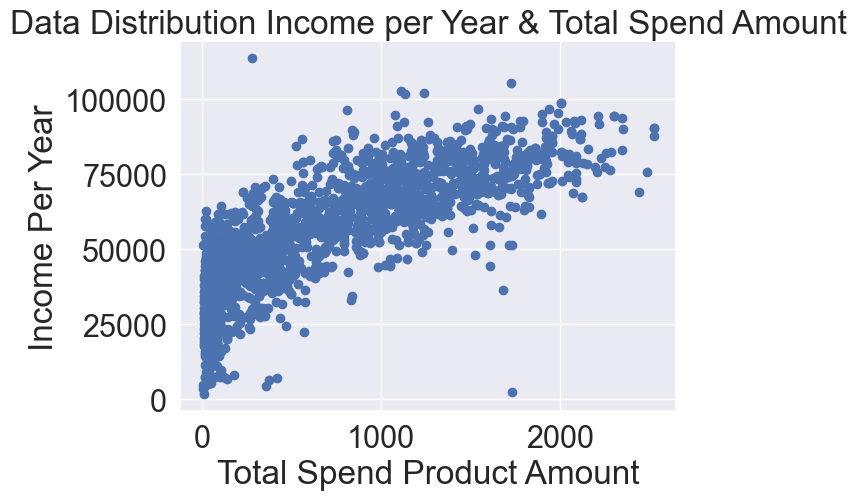

In [593]:
ds = dfCorr.copy()
plt.scatter(ds['TotalMnt'],ds['Income'])
plt.xlabel('Total Spend Product Amount')
plt.ylabel('Income Per Year')
plt.title('Data Distribution Income per Year & Total Spend Amount')
plt.show()

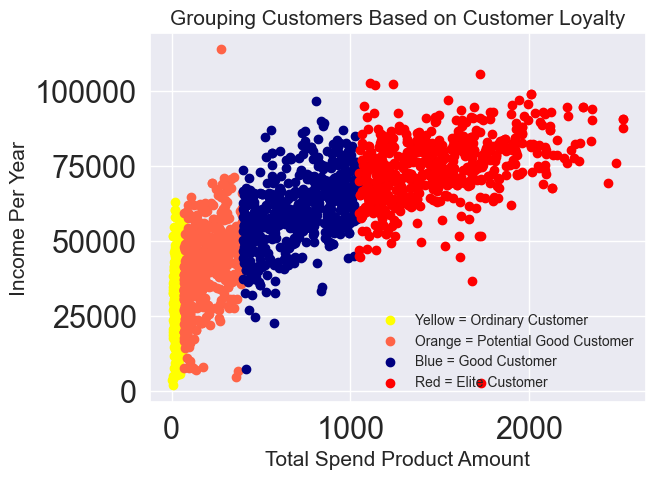

In [594]:
df1 = ds[ds['TotalMnt_Cat']=='Low Number of Total Amount']
df2 = ds[ds['TotalMnt_Cat']=='Medium to Low Number of Total Amount']
df3 = ds[ds['TotalMnt_Cat']=='Medium to High Number of Total Amount']
df4 = ds[ds['TotalMnt_Cat']=='High Number of Total Amount']
plt.scatter(df1['TotalMnt'],df1['Income'],color='yellow')      # Ordinary Customer
plt.scatter(df2['TotalMnt'],df2['Income'],color='tomato')      # Potential Good Customer
plt.scatter(df3['TotalMnt'],df3['Income'],color='navy')        # Good Customer
plt.scatter(df4['TotalMnt'],df4['Income'],color='red')         # Elite Customer
plt.title('Grouping Customers Based on Customer Loyalty', fontsize=15)
plt.legend(['Yellow = Ordinary Customer','Orange = Potential Good Customer','Blue = Good Customer','Red = Elite Customer'], fontsize=10)
plt.xlabel('Total Spend Product Amount', fontsize=15)
plt.ylabel('Income Per Year', fontsize=15)

plt.show()

There are four categories which represents customer loyalty in shopping. It divided by the number of customers shopped in the past 2 years. After being plotted with income data, shows that the correlation between these two parameters is very strong and forms a linear curve. 
1. **Ordinary Customer** : Customer that spending low number of Total Amount All Products
2. **Potential Good Customer** : Customer that spending medium to low number of Total Amount All Products
3. **Good Customer** : Customer that spending medium to high number of Total Amount All Products
4. **Elite Customer** :Customer that spending high number of Total Amount All Products

* It also shown that there are some customers (in small numbers) become outliers. The customer that have low income but it have a high total spend amount of products, also customer that have high income but have low spend amount of product.
* By knowing the level of Customer loyalty by categorizing, can make strategy for that different market target with specific marketing campaigns. 

## `Analyze the supermarket campaign effectiveness related to sales rate`

First, check for the correlation and signification between customer categories and campaign. How strong the correlation that two parameter. It's needed to as an initial identification for the analysis of the campaign

interval columns not set, guessing: ['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'TotalAcceptedCmp']


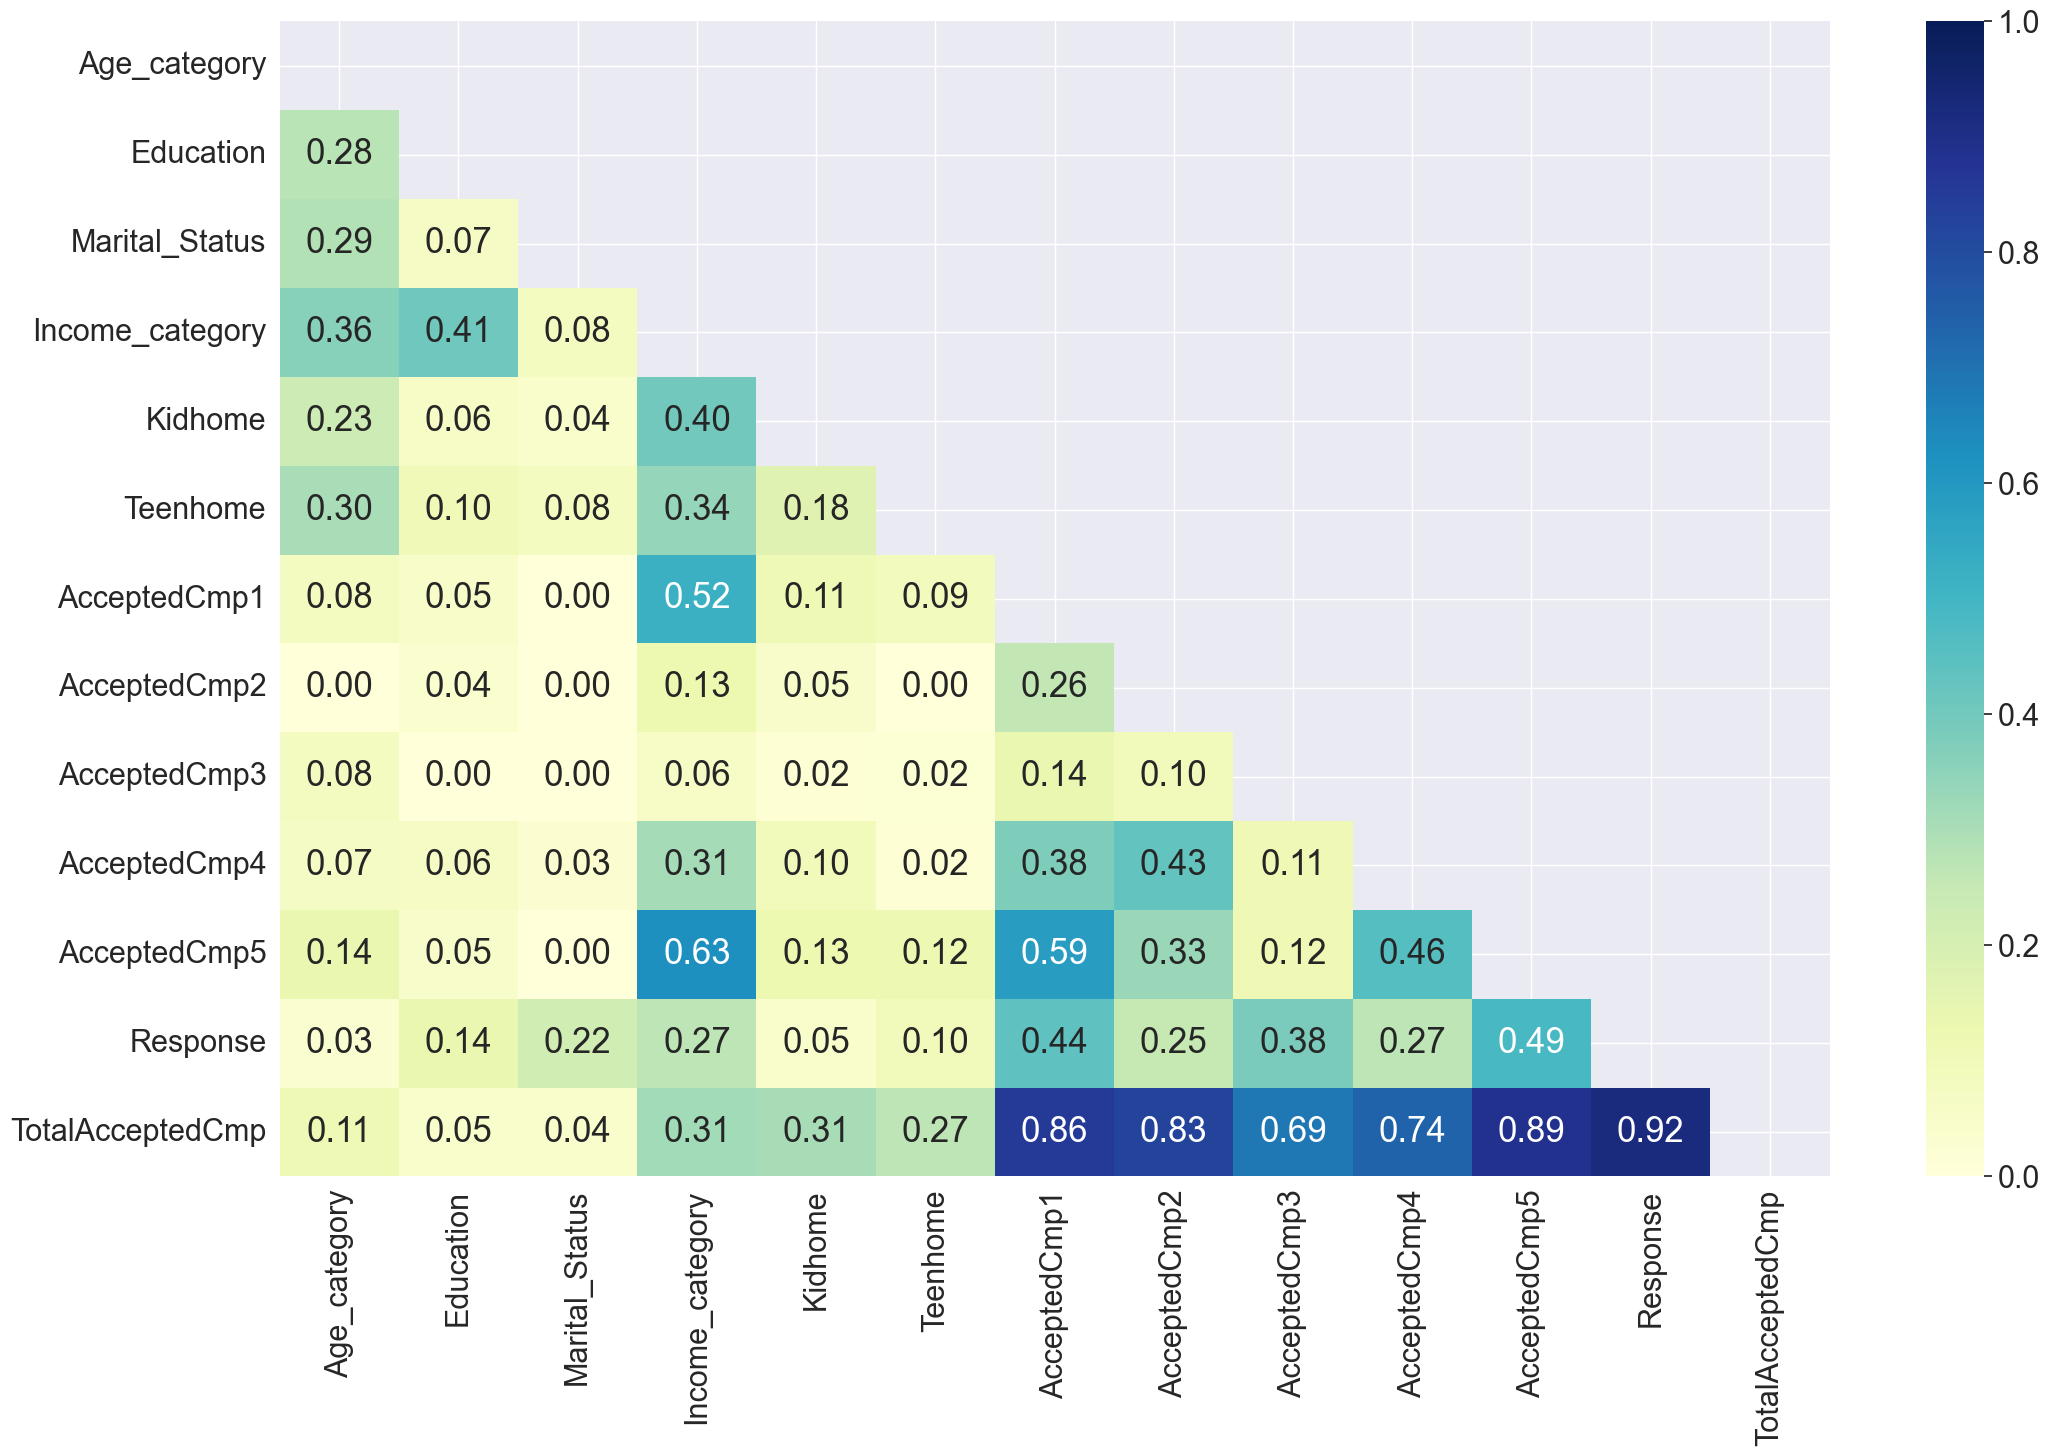

interval columns not set, guessing: ['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'TotalAcceptedCmp']


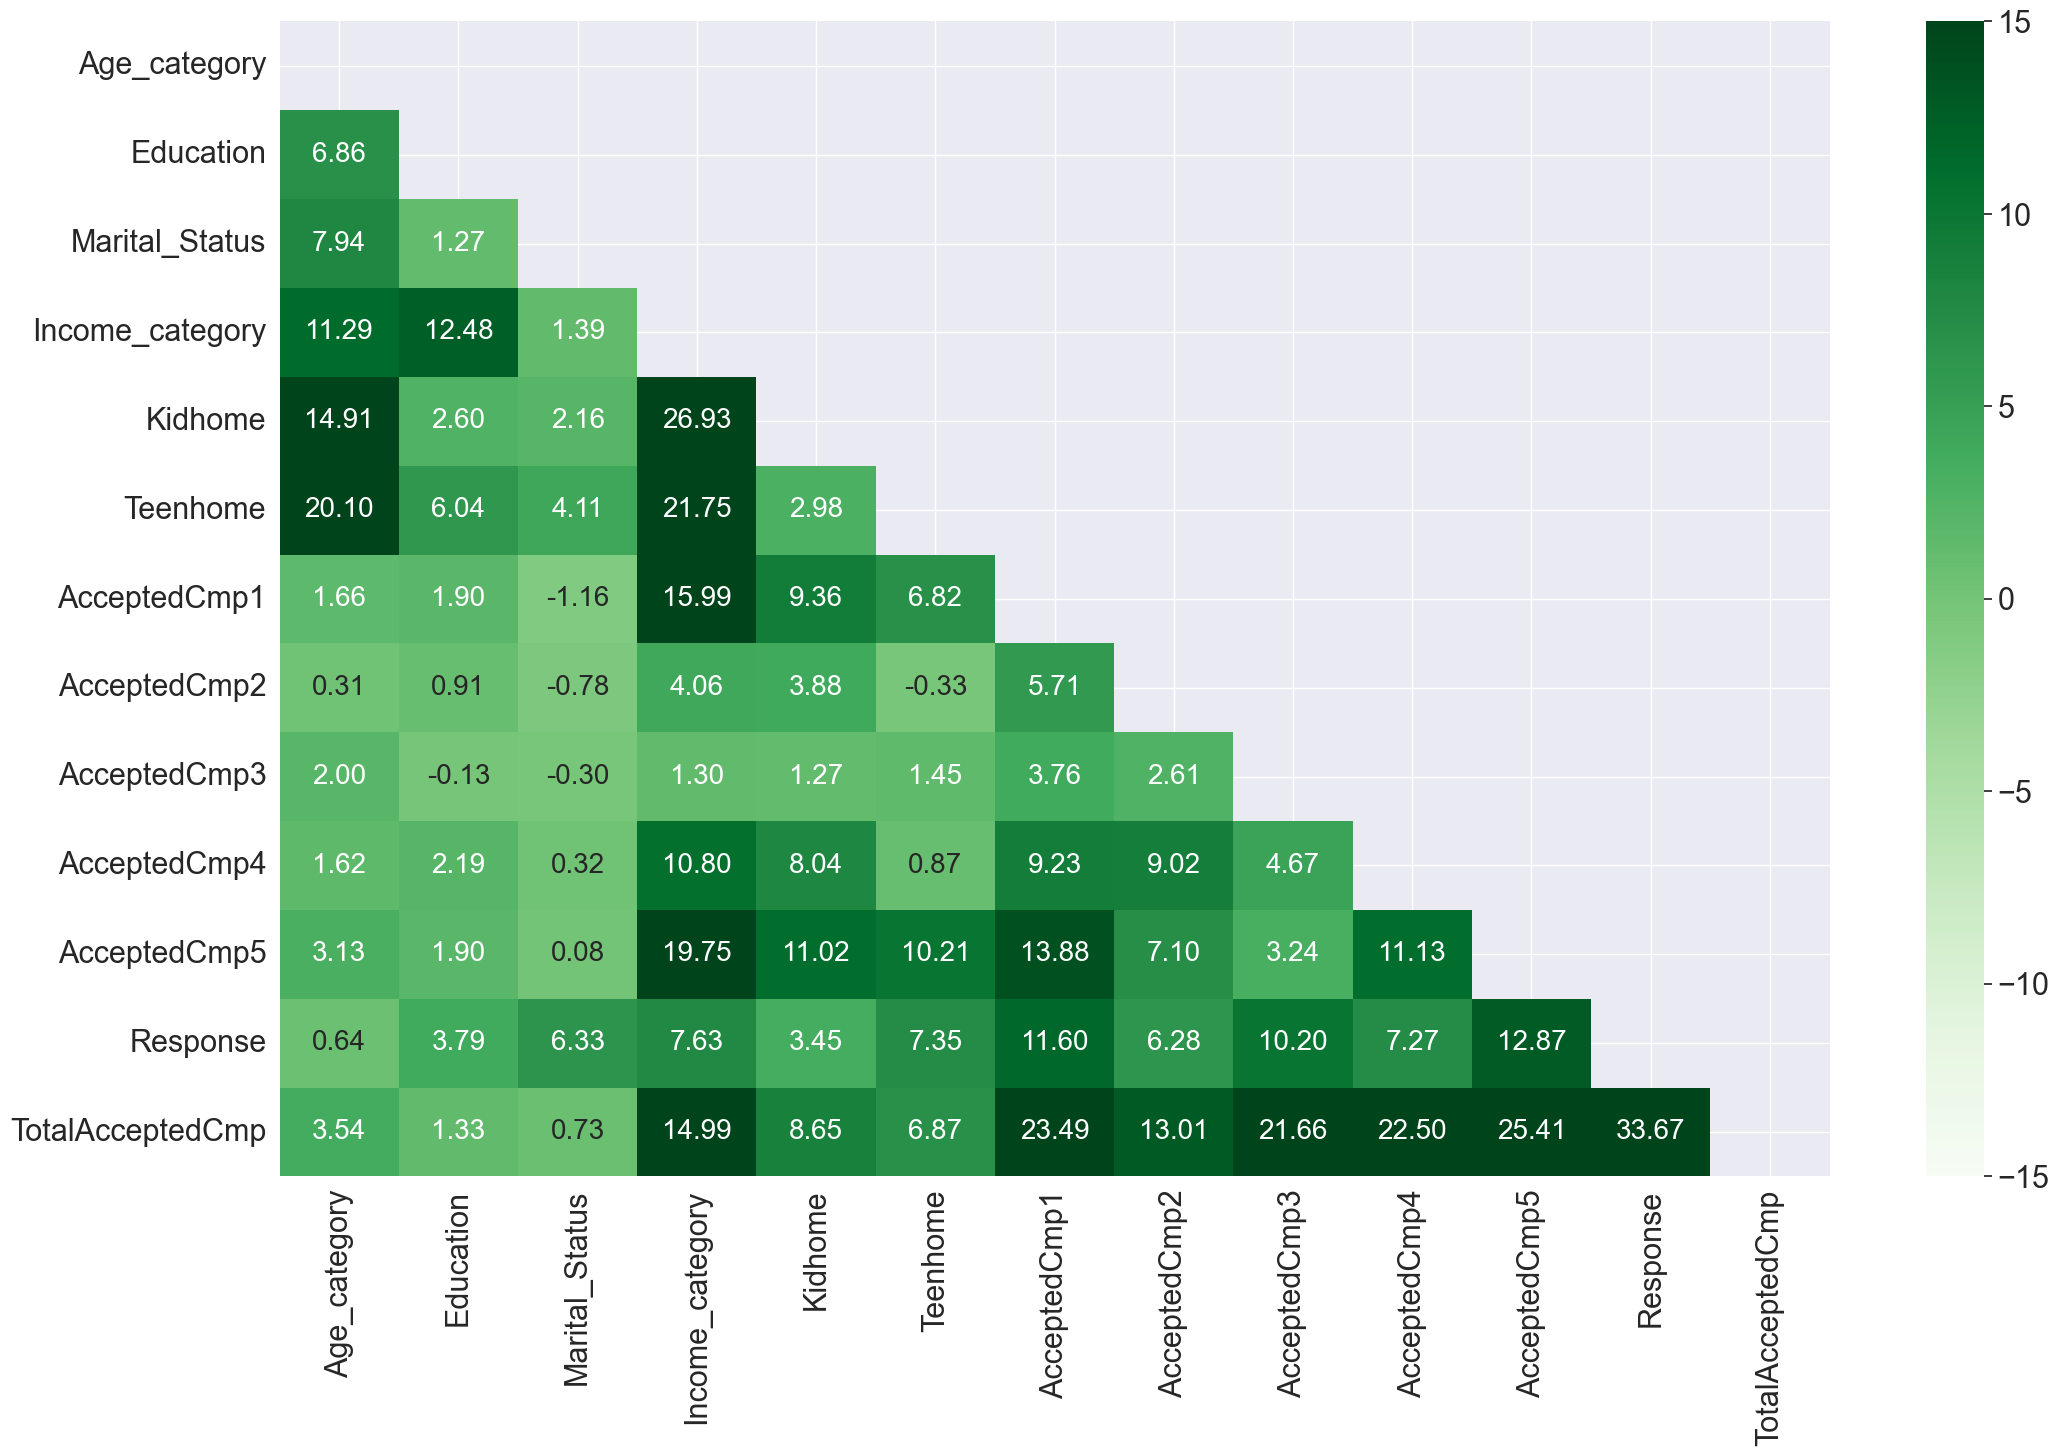

In [595]:
# Check the correlation and signification

# separating the column that we need beetween customer category, product amount and place
dfCorrMap = dfCorr[['Age_category','Education','Marital_Status','Income_category','Kidhome','Teenhome','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'TotalAcceptedCmp']]
# heatmap of variable correlation 
fig, ax = plt.subplots(figsize=(25, 15))
phik_overview = dfCorrMap.phik_matrix()
corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"fontsize":25})
sns.set(font_scale=2)
plt.show()

# heatmap of variable significance
fig, ax = plt.subplots(figsize=(25, 15))
significance_overview = dfCorrMap.significance_matrix()
corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f', annot_kws={"fontsize":20})
sns.set(font_scale=2)
plt.show()

Based on correlation and signification checking between the campaign and the customer categories. The correlation is not too high, only in income_categories is quite high with the campaign.
 

Firstly, we check for the number of customers who received the campaign and which customers did not receive the campaign.

In [596]:
CmpReceive = df.TotalAcceptedCmp.value_counts()
CmpReceive

TotalAcceptedCmp
0    1631
1     370
2     142
3      51
4      36
5      10
Name: count, dtype: int64

The number customer that receive and accept the campaign is 609
The number customer that not receive and accept the campaign is 1631


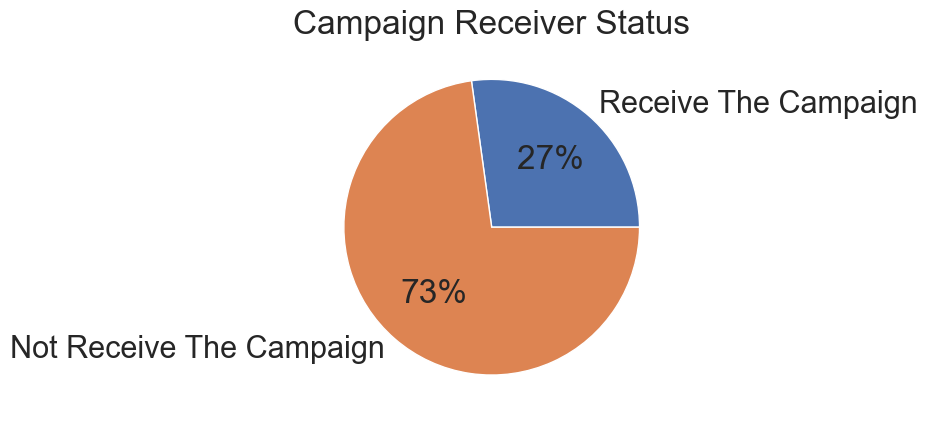

In [597]:
# Count and check the customer who receive the campaign and not receive the campaign.

Accept = CmpReceive[[1,2,3,4,5]].sum()
NotAccept =  CmpReceive[[0]].sum()

set_labels(title="Campaign Receiver Status")
plt.pie([Accept, NotAccept], labels = ['Receive The Campaign', 'Not Receive The Campaign'], autopct='%.0f%%');

print (f'The number customer that receive and accept the campaign is {Accept}')
print (f'The number customer that not receive and accept the campaign is {NotAccept}')

Based on that pie diagram, there are 73% of members (total 1631 peoples) who did not receive the campaign, while 27% of members (total 609 peoples) received the campaign. Need normality test to prove whether campaign affects the sales of products.   

We also check the campaign distribution that success receive by the customer, with check the percentage of campaign comparison for each bacth campaign.

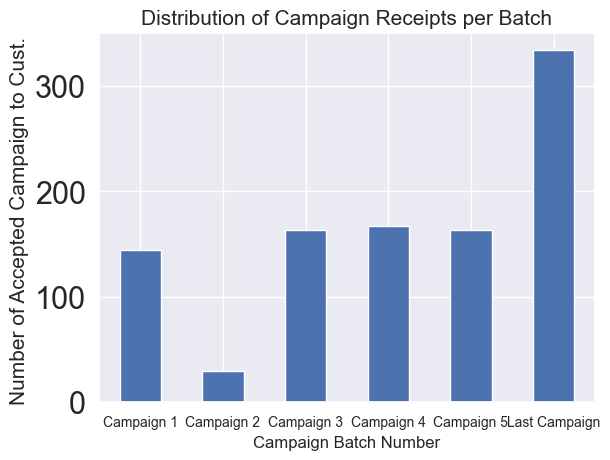

In [614]:
# campaign columns
campaignCols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# plot data
df[campaignCols].sum().plot(kind='bar')

# title
plt.title("Distribution of Campaign Receipts per Batch", fontsize=15)

# set x and y label
plt.ylabel("Number of Accepted Campaign to Cust. ", fontsize=15)
plt.xlabel("Campaign Batch Number", fontsize=12)
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last Campaign'], fontsize=10)

# rotate x label
plt.tick_params(axis='x', labelrotation=360);

In [615]:
aCmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Response']].sum(axis=0)
names = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Last Campaign']

fig = px.pie(values=aCmp.values, names=names, hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Percentage of Accepted Offers Per Campaign', title_x=0.5)

The last campaign has most accepted campaign received by customer, taking around 33.4% of all. Make this campaign become most successful campaign. Overall campaign in each bacth success to increase tge distribution value received by customers, campaign 1 amounted to 14,4 %, campaign 3 amounted to 16,3%, campaign 4 amounted to 16,7%, campaign 5 amounted to 16,3%. Only the campaign 2, the number received is very small. It's necessary to do depth analysis so the problems will not occur in future, check if the campaign 2 :
* Campaign programs that are less attractive.
* The products offered in campaign 2 are not good.
* Ineffective media/ ways for communicating campaigns to customers.

### Check if Number Campaign Received by Customer increasing the Number Amount of Purchase

Now, try to find out whether the results of campaigns that received by customer are effective or not in increasing the number of product purchases. Before we continue to check we better to know, is that correct if total amount of customer who accept the campaign has relation with the total amount customer who not accept the campaign by perform hypothesis checking. 

Median: 396.0


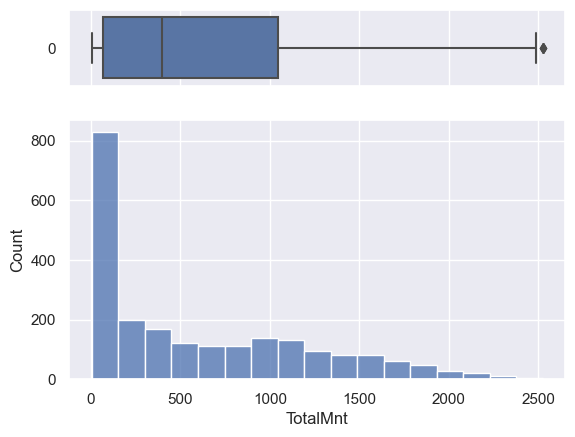

KstestResult(statistic=0.8413447460685429, pvalue=0.0, statistic_location=True, statistic_sign=-1)

In [600]:
# Check The Normal Distribution of Total Amount 

# Price variable 
print(f'Median: {df.TotalMnt.median()}')
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .85)})
 
# assigning a graph to each ax
sns.boxplot(df["TotalMnt"], ax=ax_box, orient='h')
sns.histplot(data=df, x="TotalMnt", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

# Graphical test for known the distribution total amount
plt.style.use('seaborn-whitegrid')

kstest(~df['TotalMnt'].isna(), 'norm')

### Hypothesis Testing Campaign with the Total Amount

It is obtained from Histogram and P-Plot testing that the data pattern is **skewed right** and the result of the p-value is 0. So can be concluded that the "total amount" columd data is the distribution data **not normal**. In data with not-normal distribution we use the **median** as data center. And we will perform hypothesis testing using **"Two Sample Z-Test"** for more accurate data analysis. 

HYPOTHESIS

* H0 : Total spend amount of Customer with the Campaign = Total spend amount of Customer without the Campaign
* HA : Total spend amount of Customer with the Campaign > Total spend amount of Customer without the Campaign

In [601]:
# Check the median of the Total Amount column

df['TotalMnt'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalMnt, dtype: float64

In [602]:
TotalMntMed = 396.00

# discretization Total Amout by median value 
def TotalAmount_disc (df):
    if df.TotalMnt < TotalMntMed:
        return "Low to Mid"
    else:
        return "Mid to High"
    
df['TotalAmount_disc'] = df.apply(TotalAmount_disc, axis=1)

In [603]:
# number of spent category
Pivot_Campaign = df[['campaignAccept','TotalAmount_disc']].pivot_table(
    index= 'campaignAccept',
    columns= 'TotalAmount_disc',
    values= 'TotalAmount_disc',
    aggfunc= len
)

Pivot_Campaign

TotalAmount_disc  Low to Mid  Mid to High
campaignAccept                           
Accept                   161          448
Not Accept               957          674

In [604]:
Pivot_Campaign.loc['Accept','Mid to High']

448

In [605]:
# number of Accept the campaign and Mid to High amount
nHighAcp = Pivot_Campaign.loc['Accept','Mid to High']

# number of Not Accept the campaign and Mid to High amount
nHighNotAcp = Pivot_Campaign.loc['Not Accept','Mid to High']

# number of accept customers
n_acp = Pivot_Campaign.sum(axis=1)['Accept']

# number of never accept customers
n_notacp = Pivot_Campaign.sum(axis=1)['Not Accept']

from statsmodels.stats.proportion import proportions_ztest

stat, pvalue = proportions_ztest(
    count = [nHighAcp, nHighNotAcp],   
    nobs = [n_acp, n_notacp],
    alternative ='larger'
)

pvalue/2


1.3599409939928281e-42

### Conclusion of Hypothesis Testing Campaign with the Total Amount

*   Due to Pvalue is **1.3599409939928281e-42** or **<= 0.05**. mean success to reject Ho. We have an evidence that prove that the Proportion of total amount with the Campaign is larger between Proportion of total amount without the Campaign. The proportions has a large difference gap.

In [606]:
cols = ["TotalMnt"]
display(df.groupby('TotalAcceptedCmp')[cols].agg('mean'),
)

TotalMnt
TotalAcceptedCmp             
0                  458.109135
1                  830.097297
2                 1066.591549
3                 1486.921569
4                 1673.527778
5                 1514.000000

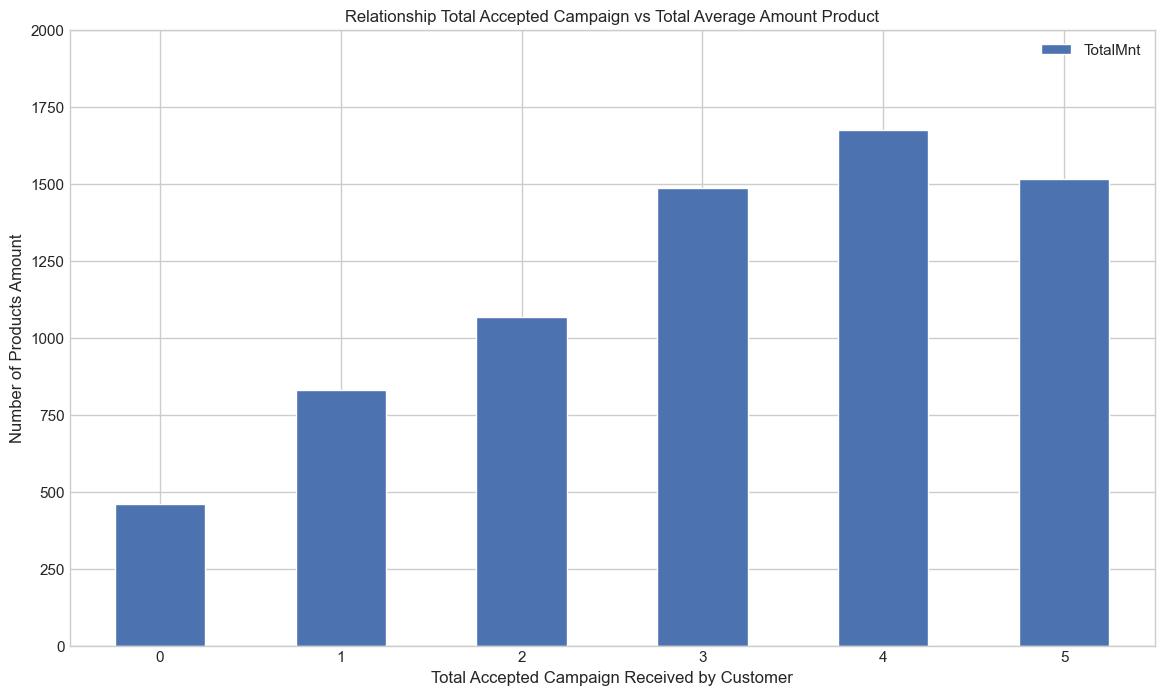

In [607]:
# plot based on categorical columns vs promotion columns
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1, figsize=(14,8))

axEach = [ax1]
colList = ['TotalAcceptedCmp']
titleEach = ['Relationship Total Accepted Campaign vs Total Average Amount Product']

for i in zip(axEach,colList,titleEach):
    df.groupby(i[1])[cols].agg('mean').plot(kind='bar', ax=i[0])
    i[0].set_title(i[2])
    i[0].tick_params(axis='x', labelrotation=360)
    i[0].set_xlabel('Total Accepted Campaign Received by Customer')
    i[0].set_ylabel('Number of Products Amount')
    i[0].set_ylim(bottom=0, top=2000)

Found that the number of acceptance of the number of campaigns received by Customer can effectively increase the purchase of goods. By checking with the average purchase of goods according to the number of Customers categorized according to the number of campaign acceptances. The results of the effectiveness of increasing the number of goods only until the Customer receives the fourth campaign. It can be concluded that Customers who received the campaign on the fifth count decreased the average purchase of goods compared to Customers who received the fourth campaign.
* The average total spend amount for customers who **did not receive** the campaign is **458.11 Mnt**
* The average total spend amount for customers who **receive the campaign once** is **830.09 Mnt**
* The average total spend amount for customers who **receive the campaign twice** is **1066.59 Mnt**
* The average total spend amount for customers who **received the campaign three times** is **1486.92 Mnt**
* The average total spend amount for customers who **received the campaign four times** is **1673.52 Mnt**
* The average total spend amount for customers who **received the campaign five times** is **1514.00 Mnt**

*Note :*
**Mnt is Mongolian currency**, it is possible according to the data that this supermarket is located in Mongolia. Reference to the following link [click here](https://www.xe.com/currency/mnt-mongolian-tughrik/).

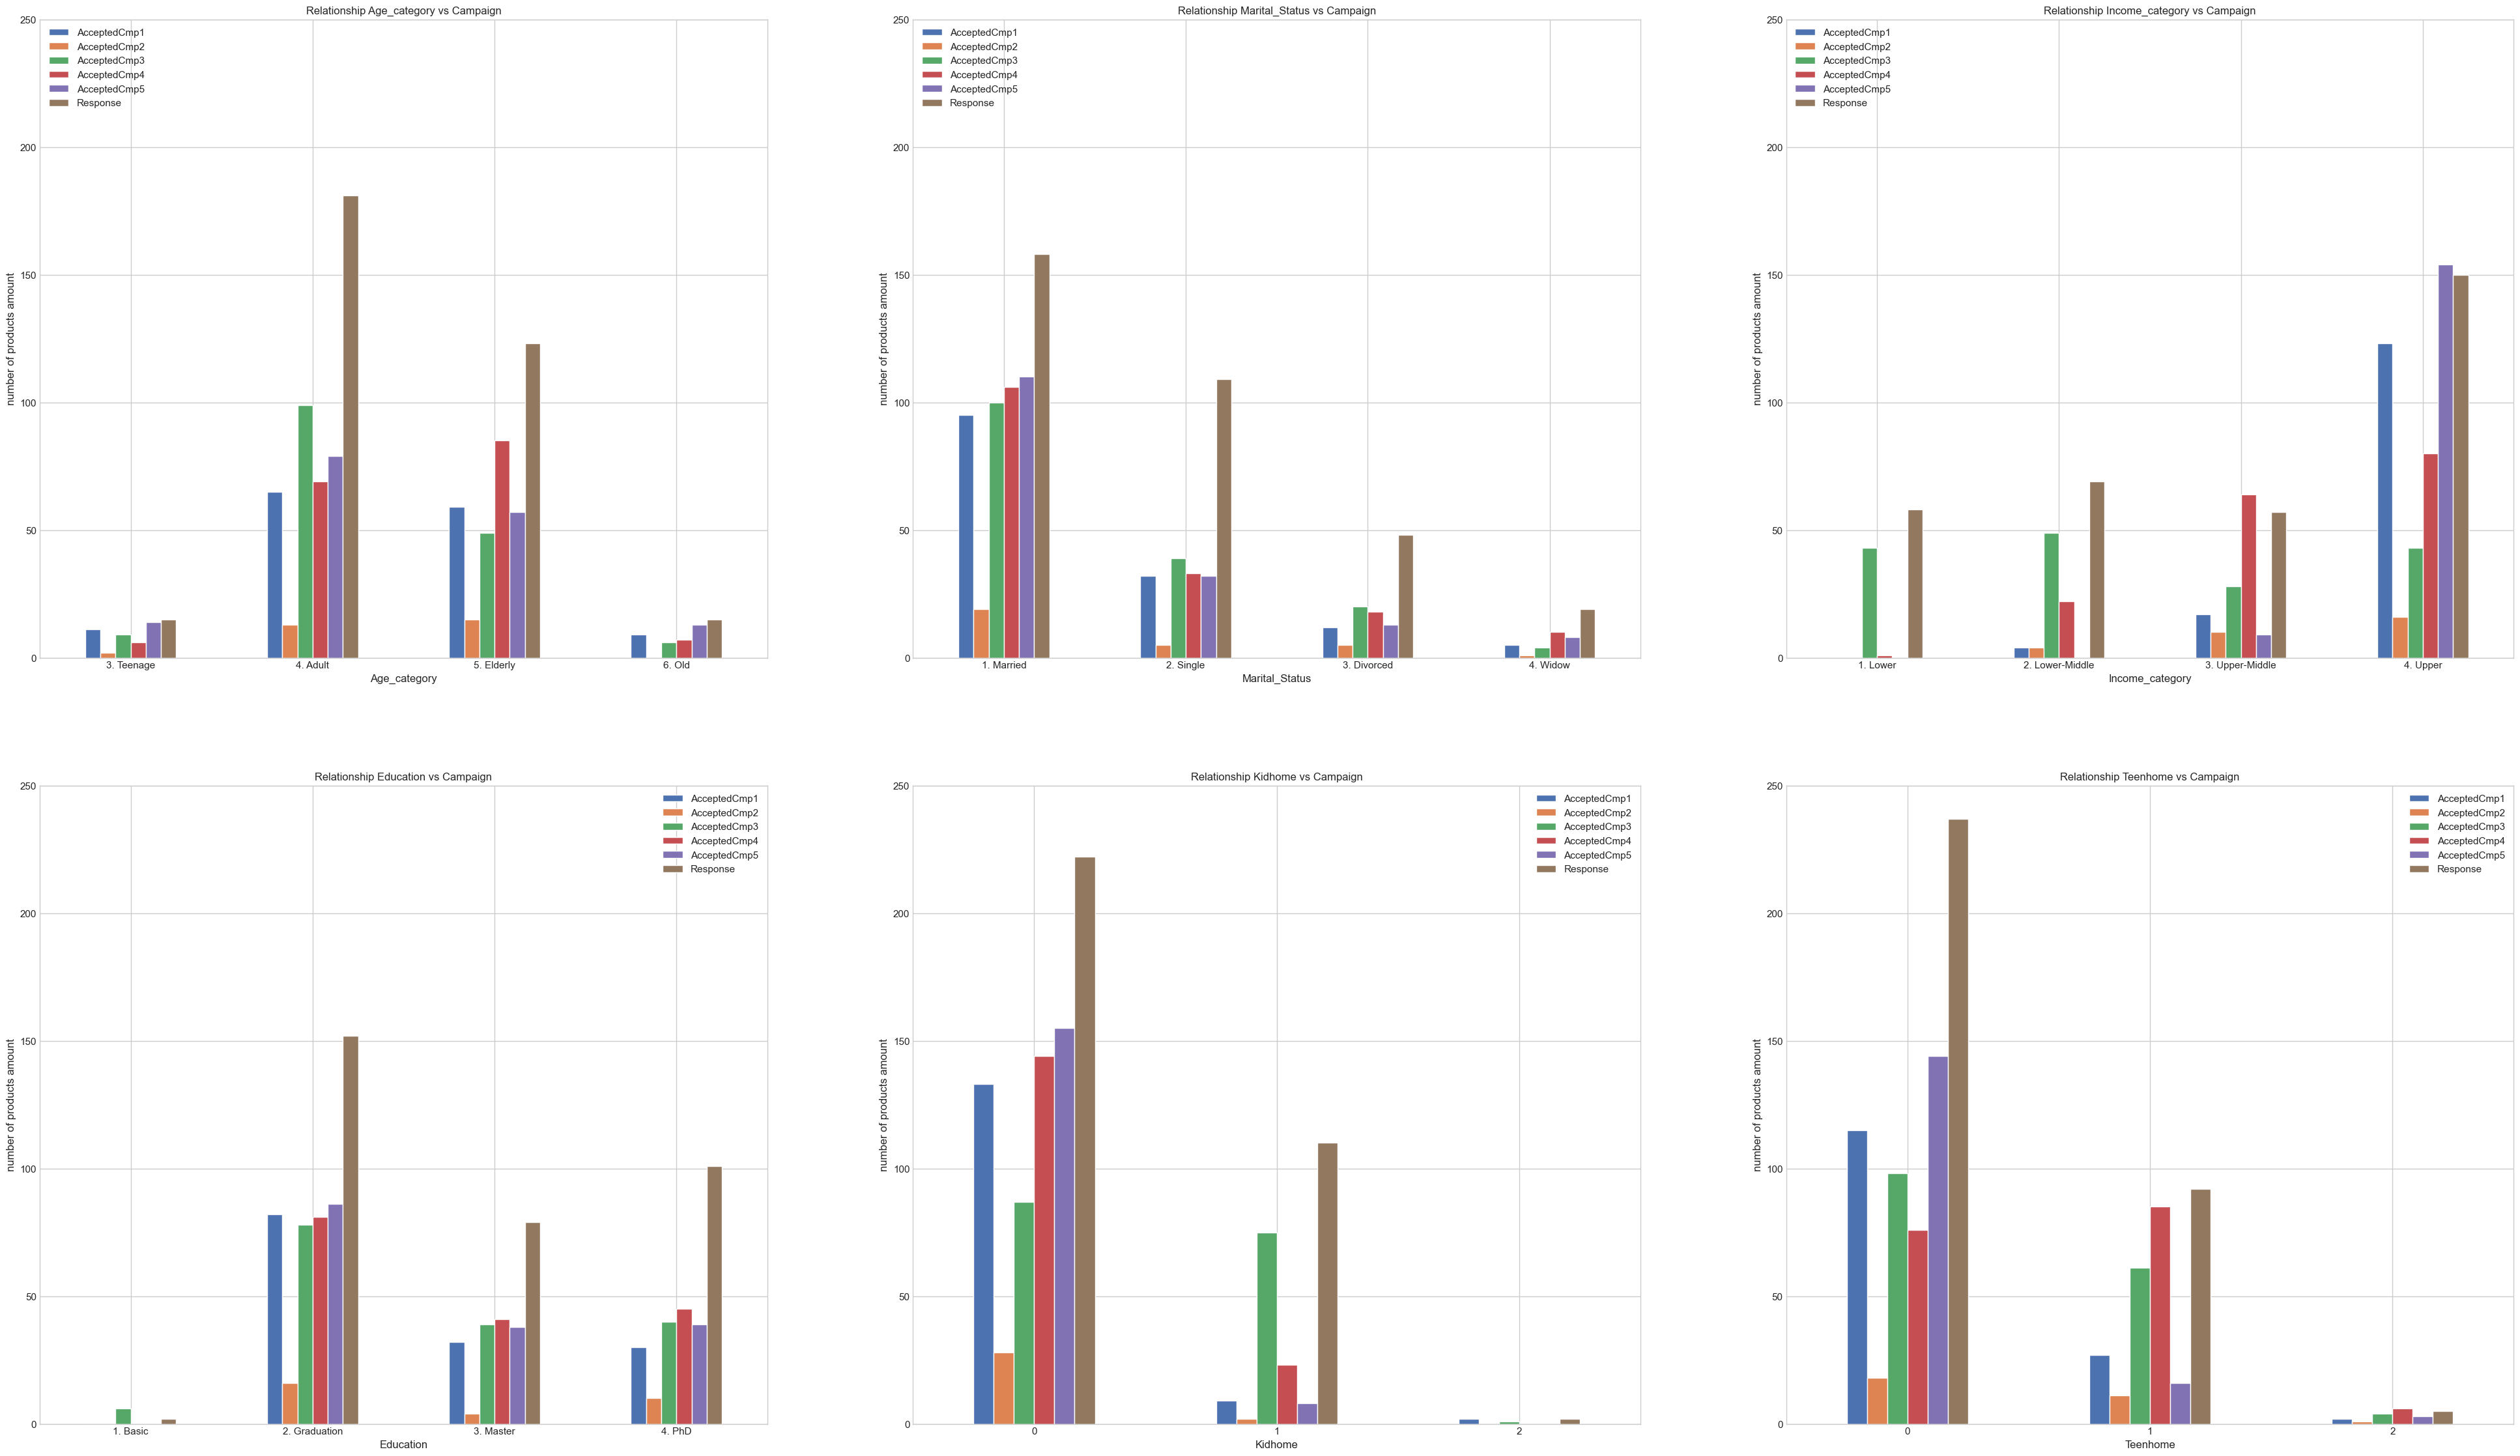

In [608]:
# plot based on categorical columns vs promotion columns
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(49,28))

ColCust = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response']

axEach = [ax1,ax2,ax3]
axEach2 = [ax4,ax5,ax6]
colList = ['Age_category', 'Marital_Status', 'Income_category']
colList2 = ['Education', 'Kidhome', 'Teenhome']
titleEach = ['Relationship Age_category vs Campaign', 'Relationship Marital_Status vs Campaign', 'Relationship Income_category vs Campaign']
titleEach2 = ['Relationship Education vs Campaign', 'Relationship Kidhome vs Campaign', 'Relationship Teenhome vs Campaign']

for i in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # data
    df.groupby(i[2])[ColCust].agg('sum').plot(kind='bar', ax=i[0])
    df.groupby(i[3])[ColCust].agg('sum').plot(kind='bar', ax=i[1])
    # set title
    i[0].set_title(i[4])
    i[1].set_title(i[5])
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('number of products amount')
    i[1].set_ylabel('number of products amount')
    # set y limit
    i[0].set_ylim(bottom=0, top=250)
    i[1].set_ylim(bottom=0, top=250)
    # set legend
    i[0].legend(loc='upper left')
    i[1].legend(loc='upper right')


The graph above explains the relationship between the campaign given to the category of customers who received the campaign. Based on the data we can obtained the following insights :
* In the **Age_category** category, it was found that the **Adult** group received the highest number of campaigns, while the least in the **Old** category.
* In the **Marital_Status** category, it was found that the **Married** group received the highest number of campaigns, while the least in the **Widow** category.
* In the **Income_category** category, it was found that the **Upper** Income group received the highest number of campaigns, while the least in the **Lower** Income category.
* In the **Education** category, it was found that the **Graduation** group received the highest number of campaigns, while the least in the **Basic** category.
* In the **Kidhome** category, it was found that the **0** Kidhome group received the highest number of campaigns, while the least in the **2** Kidhome category.
* In the **Teenhome** category, it was found that the **0** Teenhome group received the highest number of campaigns, while the least in the **2** Teenhome category.

From the information obtained, what we can conclude is that, to provide promos according to the set target, here are some steps you can pay attention to :
* *Identify the target market*: Determine the market segment you want to target with your promo. For example, do you want to target new or existing customers, or do you want to attract specialized market segments such as young or professional customers?


interval columns not set, guessing: ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'TotalAcceptedCmp']


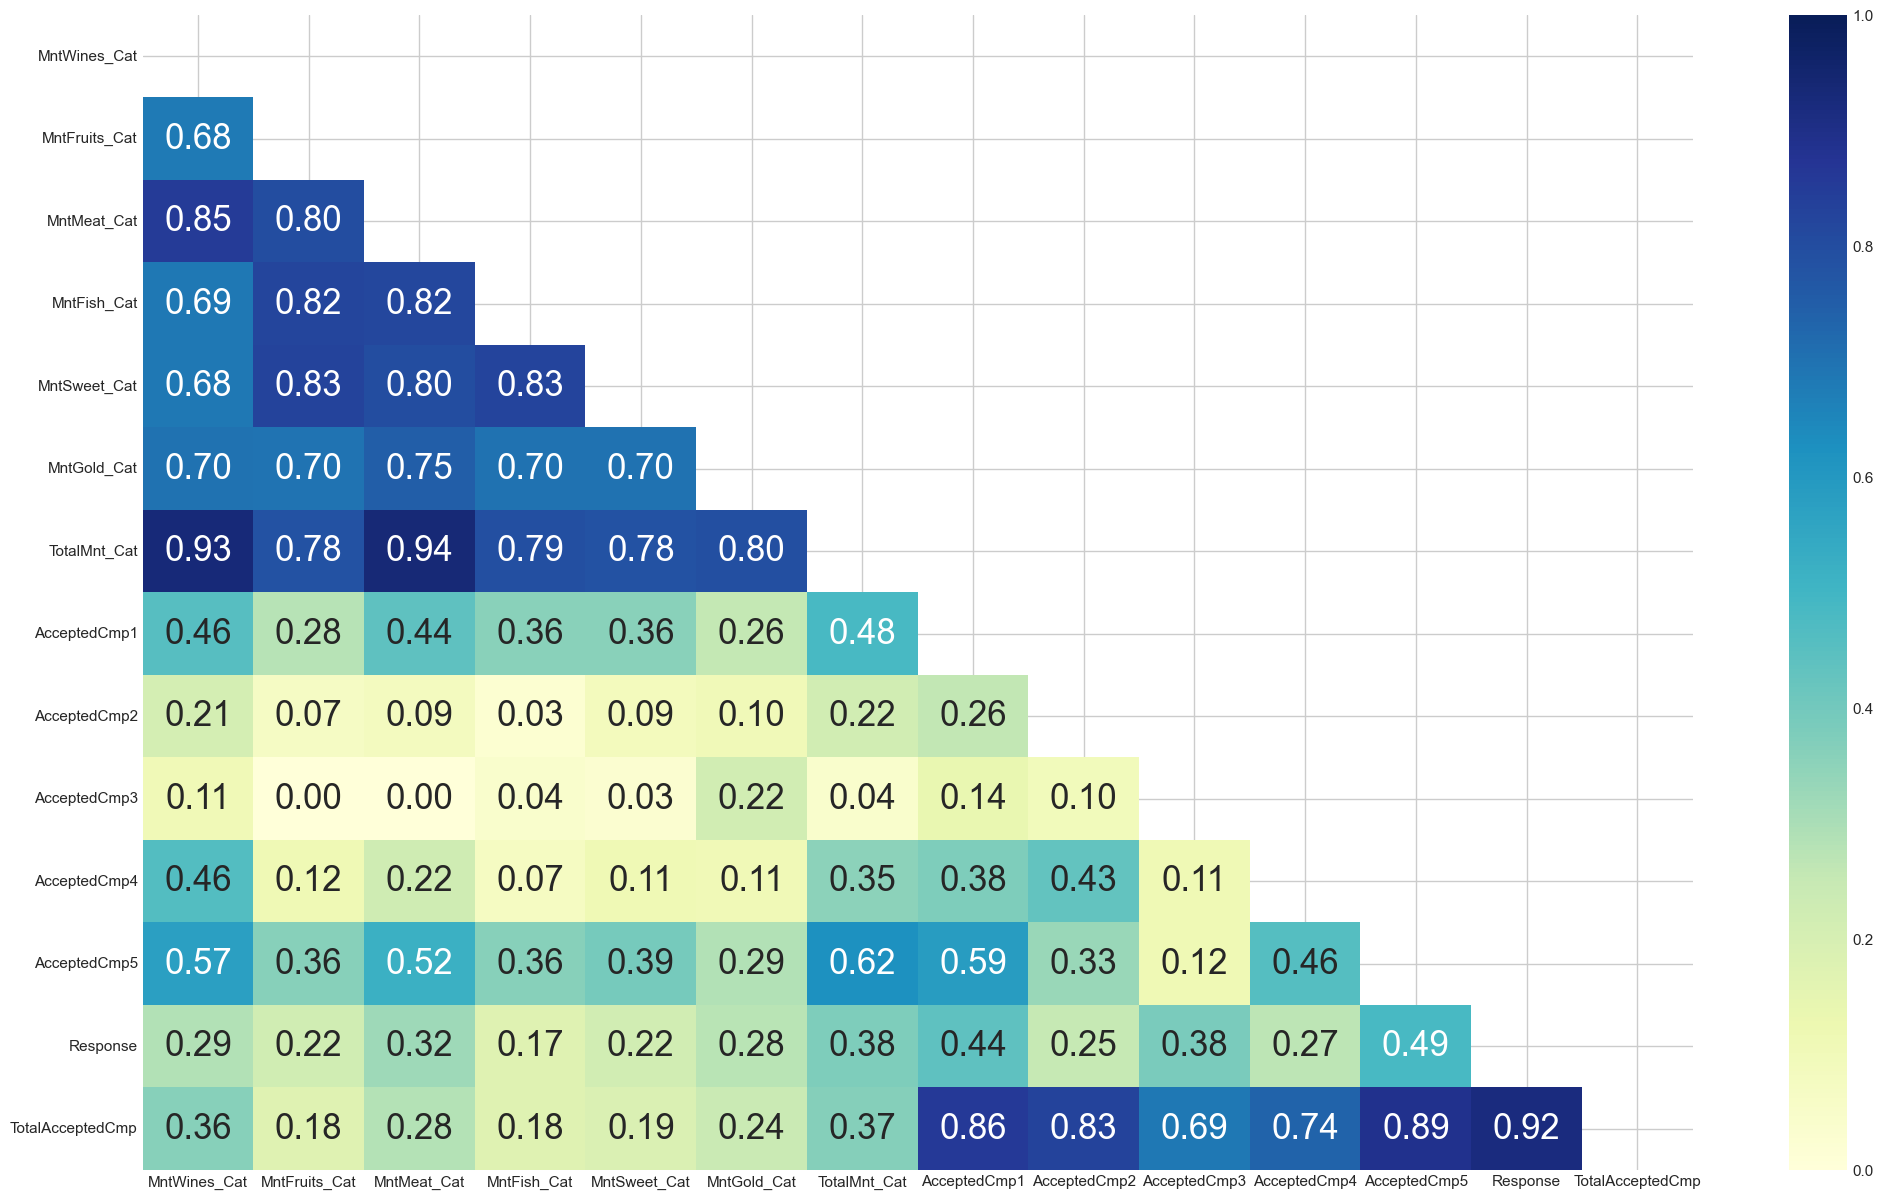

interval columns not set, guessing: ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'TotalAcceptedCmp']


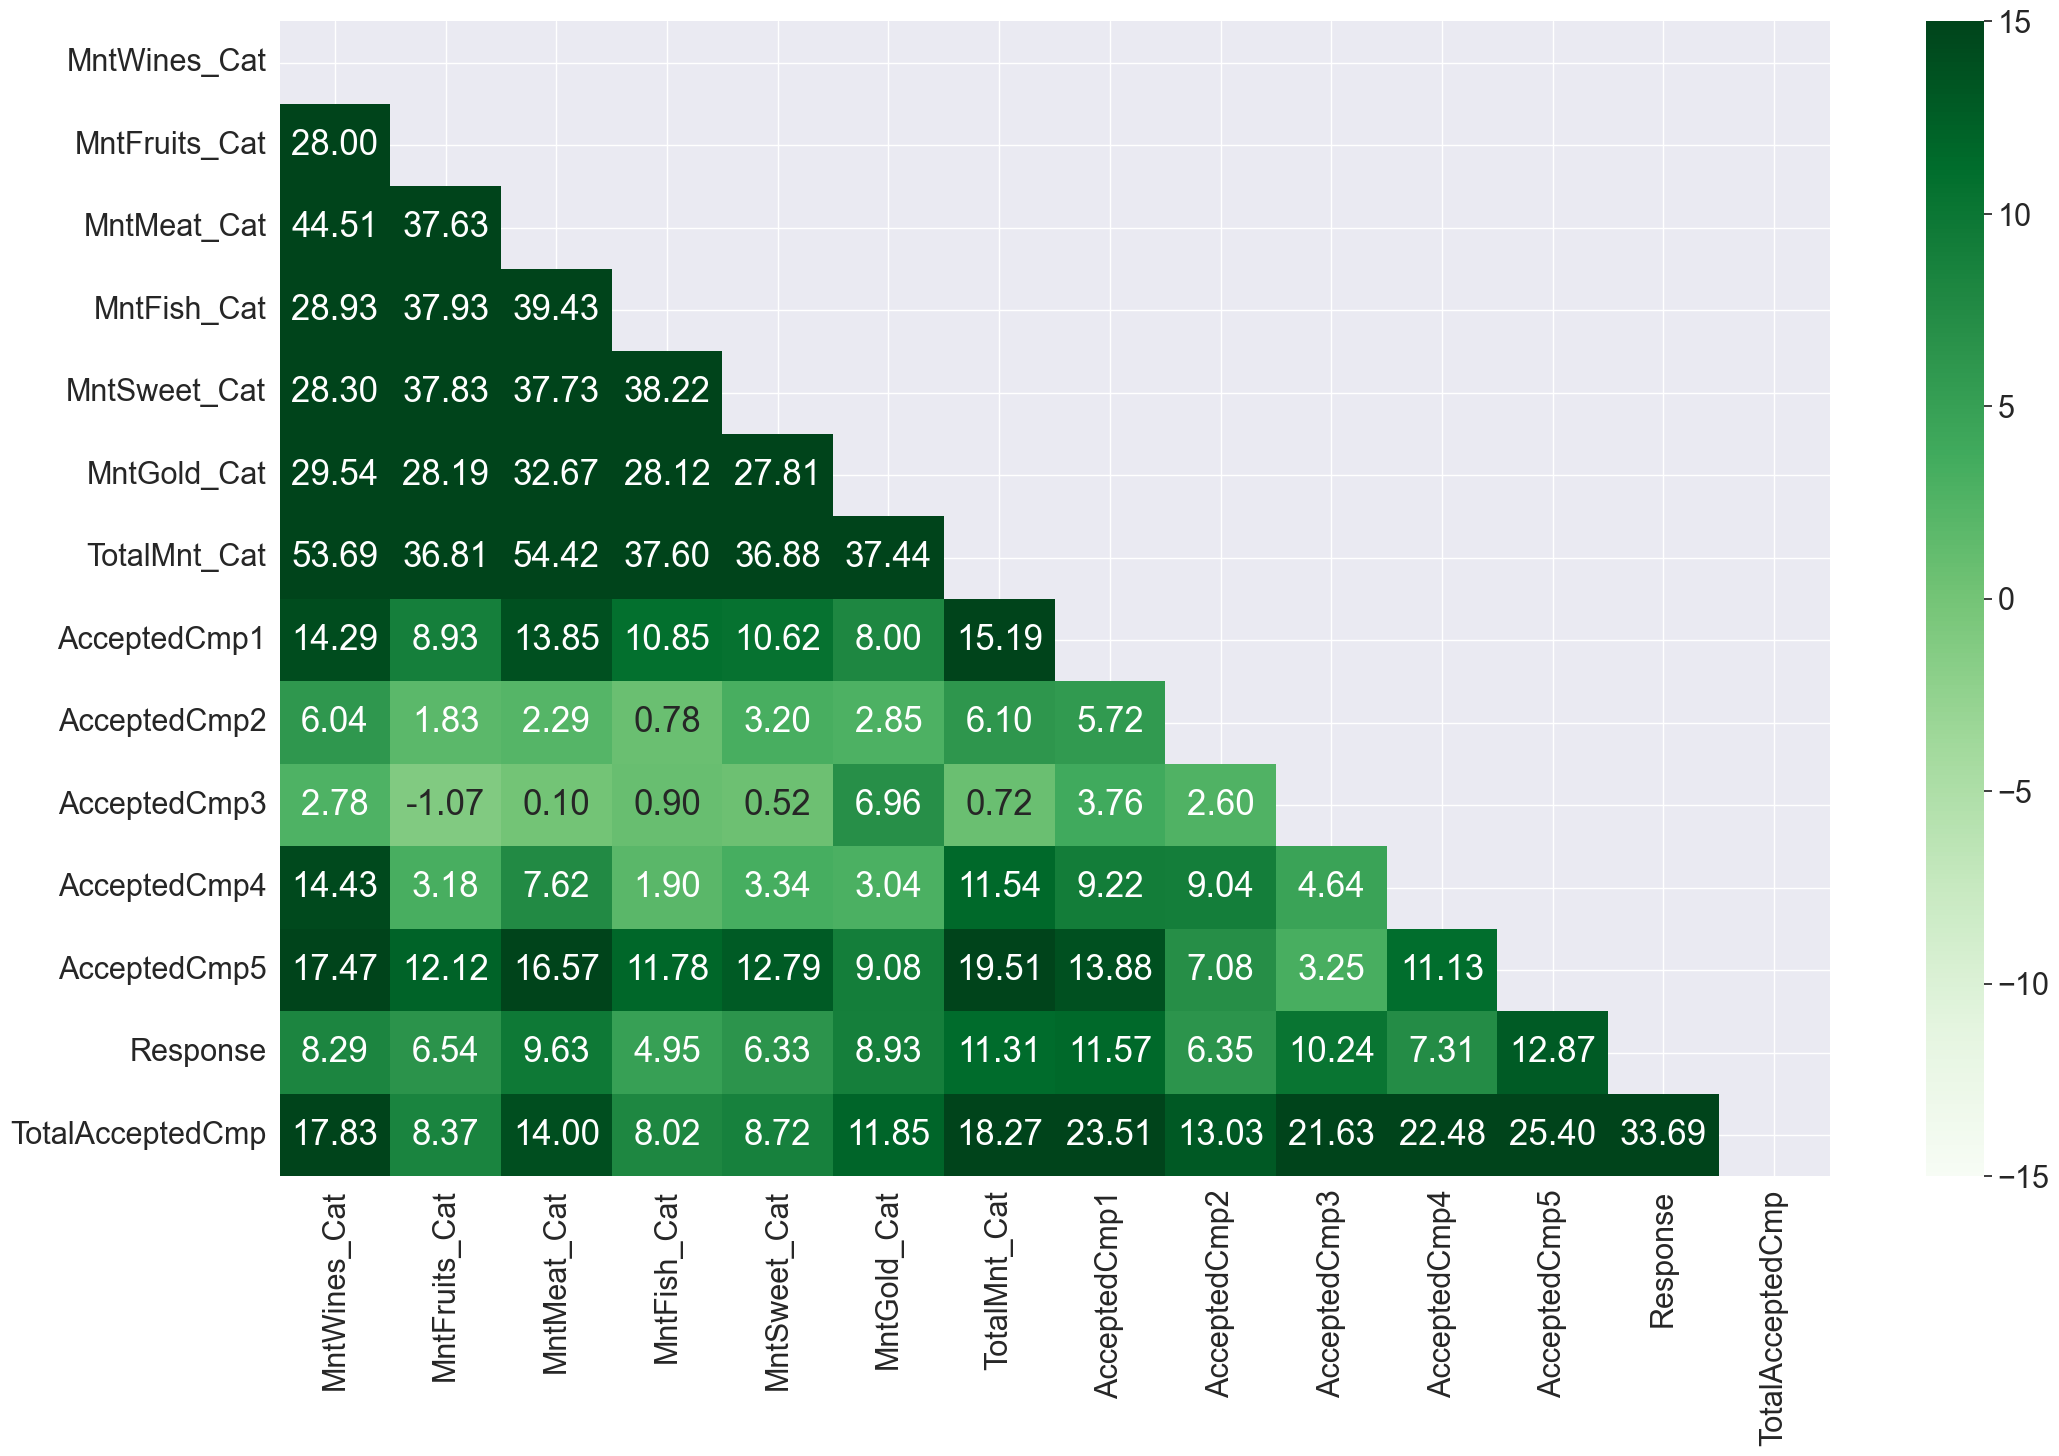

In [609]:
# Check the correlation and signification

# separating the column that we need beetween customer category, product amount and place
dfCorrMap = dfCorr[['MntWines_Cat','MntFruits_Cat','MntMeat_Cat','MntFish_Cat','MntSweet_Cat','MntGold_Cat', 'TotalMnt_Cat','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'TotalAcceptedCmp']]
# heatmap of variable correlation 
fig, ax = plt.subplots(figsize=(25, 15))
phik_overview = dfCorrMap.phik_matrix()
corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"fontsize":25})
sns.set(font_scale=2)
plt.show()

# heatmap of variable significance
fig, ax = plt.subplots(figsize=(25, 15))
significance_overview = dfCorrMap.significance_matrix()
corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f', annot_kws={"fontsize":25})
sns.set(font_scale=2)

plt.show()

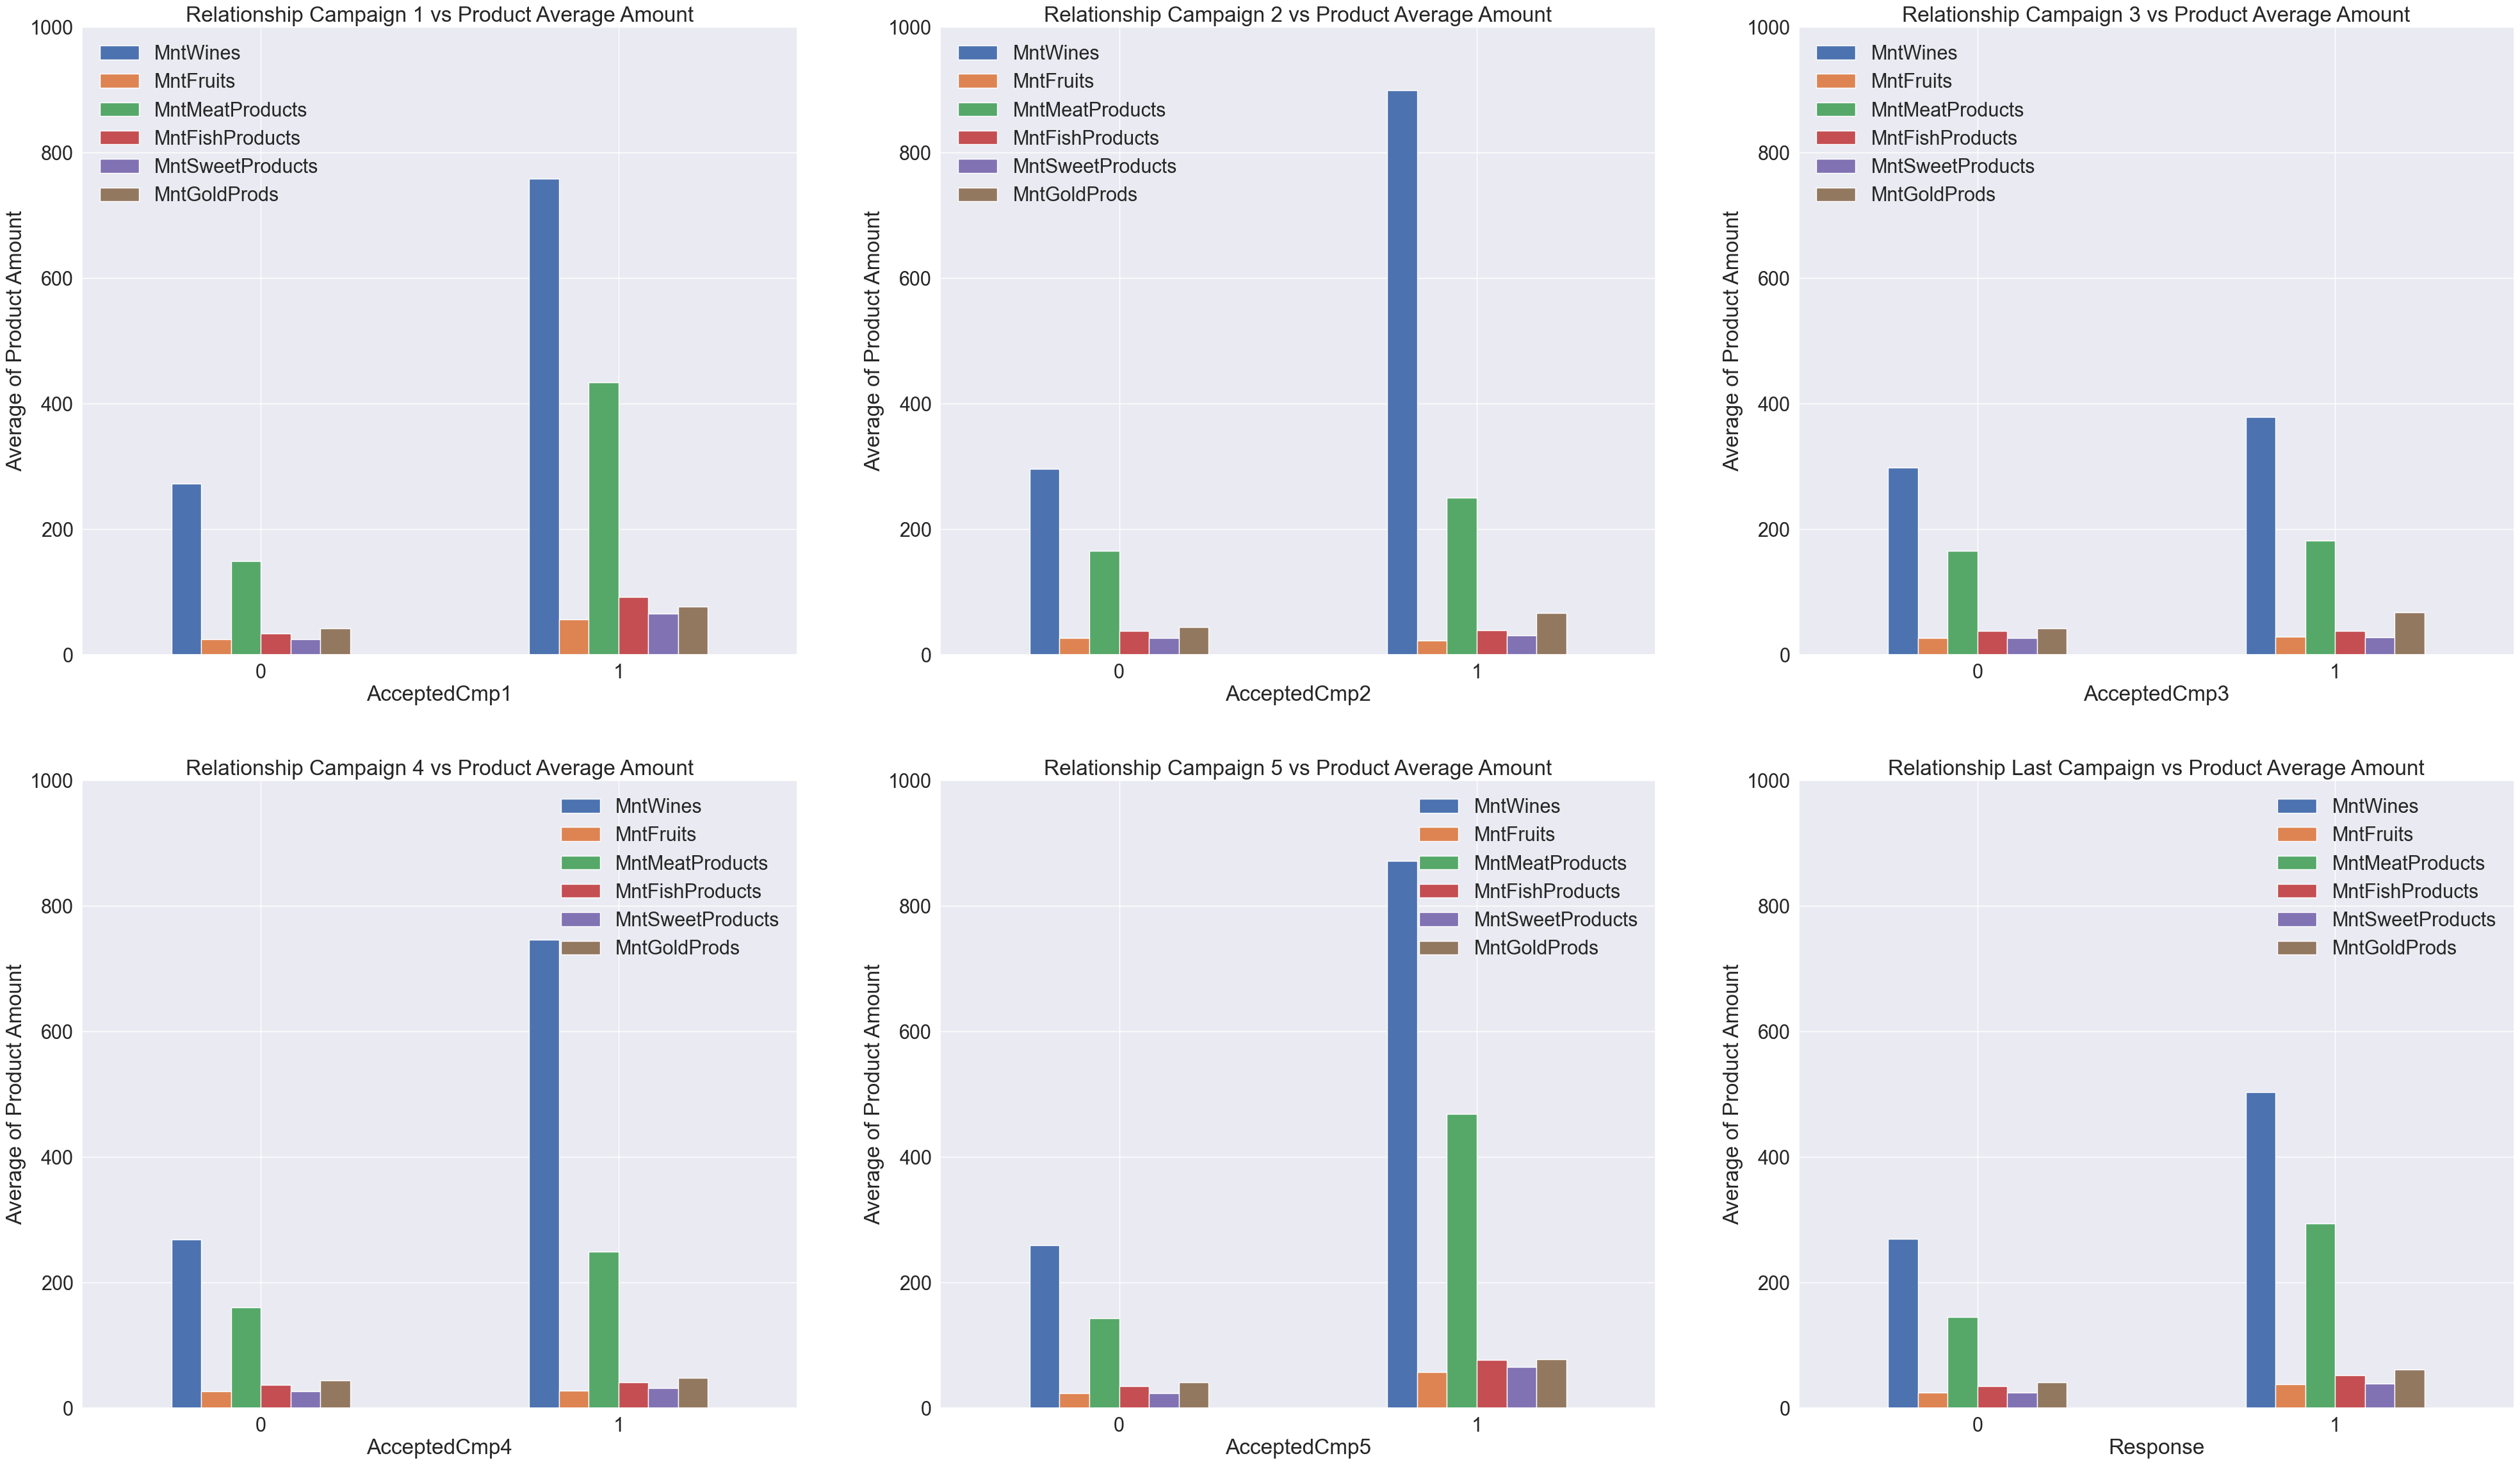

In [610]:
# plot based on categorical columns vs promotion columns
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(49,28))

ColProds = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
axEach = [ax1,ax2,ax3]
axEach2 = [ax4,ax5,ax6]

colList = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3']
colList2 = ['AcceptedCmp4', 'AcceptedCmp5', 'Response']

titleEach = ['Relationship Campaign 1 vs Product Average Amount', 'Relationship Campaign 2 vs Product Average Amount', 'Relationship Campaign 3 vs Product Average Amount']
titleEach2 = ['Relationship Campaign 4 vs Product Average Amount', 'Relationship Campaign 5 vs Product Average Amount', 'Relationship Last Campaign vs Product Average Amount']

for i in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # data
    dfCorr.groupby(i[2])[ColProds].agg('mean').plot(kind='bar', ax=i[0])
    dfCorr.groupby(i[3])[ColProds].agg('mean').plot(kind='bar', ax=i[1])
    # set title
    i[0].set_title(i[4])
    i[1].set_title(i[5])
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('Average of Product Amount')
    i[1].set_ylabel('Average of Product Amount')
    # set y limit
    i[0].set_ylim(bottom=0, top=1000)
    i[1].set_ylim(bottom=0, top=1000)
    # set legend
    i[0].legend(loc='upper left')
    i[1].legend(loc='upper right')


* The analysis results of each campaign successfully increase the results of Amount Spend of Products.
* In all campaign bacths, there was an increment Amount Spend of Products.
* the biggest increase was in wines and meat products

## `Analyze the best place for product sales`

In this supermarket, there are three kinds of places to sell goods including Store, Web and Catalog. Here's what we can conclude from the results of the number of product sales from each place

In [611]:
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
columns_new = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

total = df[columns].sum()
total.index = columns_new
total = total.reset_index(name='total')

fig = px.treemap(total, path=['index'],values='total',
                 color_discrete_sequence=px.colors.qualitative.Pastel)

fig.data[0].textinfo = 'label+text+value'
fig.update_layout(margin = dict(t=25, l=25, r=25, b=25),
                  title_text='The Number of Purchases for Each Market Place',
                  title_x = 0.5,
                  title_y = 0.96)
fig.update_traces(textposition='middle center')
fig.layout.hovermode = False

fig.show()

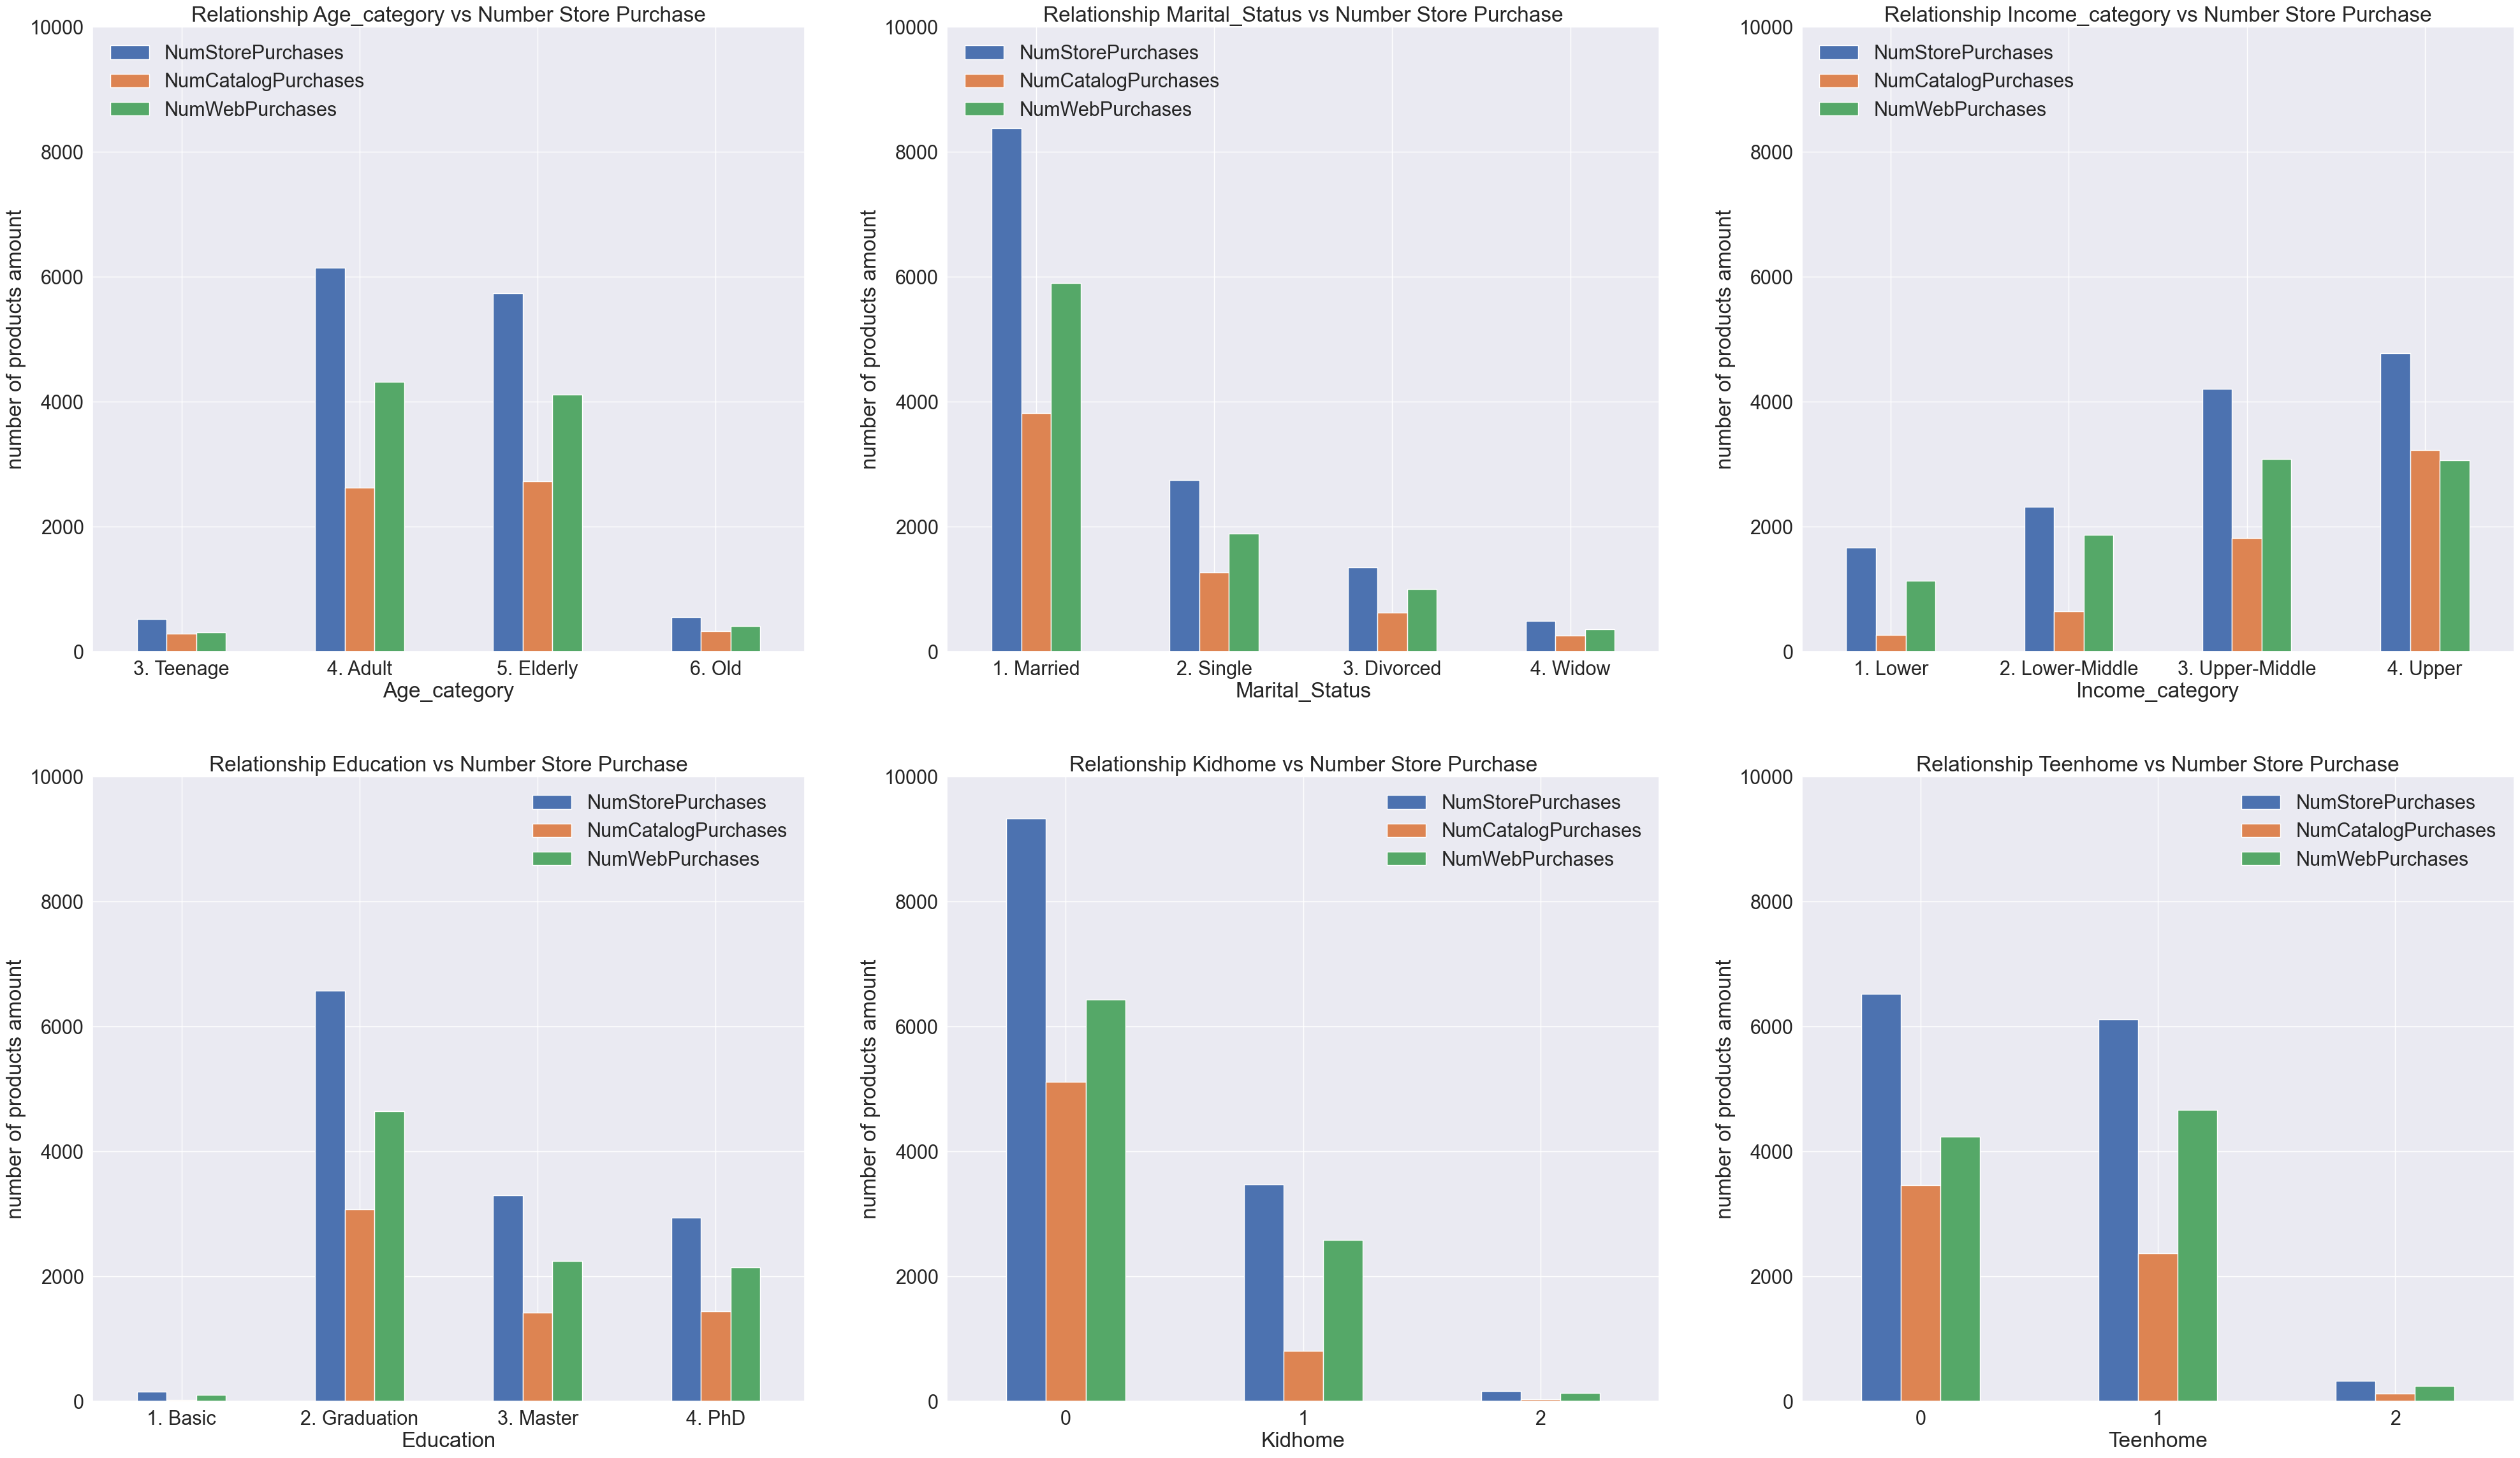

In [612]:
# plot based on categorical columns vs promotion columns
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(49,28))

ColCust = ['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases']

axEach = [ax1,ax2,ax3]
axEach2 = [ax4,ax5,ax6]
colList = ['Age_category', 'Marital_Status', 'Income_category']
colList2 = ['Education', 'Kidhome', 'Teenhome']
titleEach = ['Relationship Age_category vs Number Store Purchase', 'Relationship Marital_Status vs Number Store Purchase', 'Relationship Income_category vs Number Store Purchase']
titleEach2 = ['Relationship Education vs Number Store Purchase', 'Relationship Kidhome vs Number Store Purchase', 'Relationship Teenhome vs Number Store Purchase']

for i in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # data
    df.groupby(i[2])[ColCust].agg('sum').plot(kind='bar', ax=i[0])
    df.groupby(i[3])[ColCust].agg('sum').plot(kind='bar', ax=i[1])
    # set title
    i[0].set_title(i[4])
    i[1].set_title(i[5])
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('number of products amount')
    i[1].set_ylabel('number of products amount')
    # set y limit
    i[0].set_ylim(bottom=0, top=10000)
    i[1].set_ylim(bottom=0, top=10000)
    # set legend
    i[0].legend(loc='upper left')
    i[1].legend(loc='upper right')


Found that the number of purchases from the **Store Purchase of 12,970 Purchases** outperformed the **Web Purchase of 9150 Purchases** and **Catalog Purchase of 5963 Purchases**.

The graph above explains the relationship between the store purchases to the category of customers who purchase in each store place. Based on the data we can obtained this following insights :
* In the **Age_category** category, it was found that the **Adult** group received the highest number of campaigns, while the least in the **Old** category.
* In the **Marital_Status** category, it was found that the **Married** group received the highest number of campaigns, while the least in the **Widow** category.
* In the **Income_category** category, it was found that the **Upper** Income group received the highest number of campaigns, while the least in the **Lower** Income category.
* In the **Education** category, it was found that the **Graduation** group received the highest number of campaigns, while the least in the **Basic** category.
* In the **Kidhome** category, it was found that the **0** Kidhome group received the highest number of campaigns, while the least in the **2** Kidhome category.
* In the **Teenhome** category, it was found that the **0** Teenhome group received the highest number of campaigns, while the least in the **2** Teenhome category.

## `Checking for the Percentage of Customers Who Complained`

In checking the number of customer complaints obtained from the visualization of the pie chart below, it can be stated that the credibility of the following Supermarkets is very good. With **customer complaint rate below 1%** is an achievement that must be maintained.

In [613]:
counts = df.Complain.map({0:"No", 1:"Yes"}).value_counts()

fig = px.pie(values=counts.values, names=counts.index, hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Percentage of Customers Complained', title_x=0.5)

## `Conclusion`

### The Highest and Lowest Amount Spend of Product

* The biggest (number 1) of customer spending is on **wine** takes **50,2%** followed number 2 by **meat** at **27,6**% of spendings, It's possible because the product quality of **wine and meat** in this Supermarket have the highest product quality.
* While other products seem less desirable to buy the customer, has pecentage less than 10 % such as **gold, fish, sweet and fruits** products. This could because to this following factors that must be evaluated and improved such as Poor quality goods, the products like gold, fish, sweet and fruits are not commodities in the country, lack of effective promotion or marketing

### Reviewing Customer Segmentation Based on Amount Spend of Product

* Based on the table, barplot, correlation and significance check between each category of customer and amount spend of product, it's known that Age_category, Income_category, Education, Kidhome have high relationship to the amount spend of product, while Marital_Status, Teenhome have low relationship.
* We found and grouping four categories which represents customer loyalty in shopping :
1. **Ordinary Customer** : Customer that spending low number of Total Amount All Products
2. **Potential Good Customer** : Customer that spending medium to low number of Total Amount All Products
3. **Good Customer** : Customer that spending medium to high number of Total Amount All Products
4. **Elite Customer** :Customer that spending high number of Total Amount All Products
* It also turns out that there are some customers (in small numbers) there are an outliers like the customer that have low income but have a high total spend amount of products, also customer that have high income but have low spend amount of product.
* By knowing the level of Customer loyalty by categorizing, then we can make strategy for that different market target with the specific marketing campaigns that will more develop for each group.

### Analyze the Supermarket Campaign
* When viewed from the amount of money generated from the purchase of products by customers, the conclusion os that the campaign **effective**. There is a significant increase when compared without the campaign and with the campaign.
* There are 73% of members with a total of 1631 peoples who did not receive the campaign, while 27% of members with 609 peoples received the campaign.
* In all campaign bacths, there was an increment Amount Spend of Products.
* the biggest increase was in wines and meat products

### Analyze the Supermarket Place
* It was found that the number of purchases from the **Store Purchase of 12,970 Purchases** outperformed the **Web Purchase of 9150 Purchases** and **Catalog Purchase of 5963 Purchases**.

### Analyze Complaint to Supermarket 
* It can be stated that the credibility of the following Supermarkets is very good. With **customer complaint rate below 1%** is an achievement that must be maintained.



## `Recommendation`

Based on the analysis results several things that can be recommended are :
* Maintaining sales of products that are already have good amount spend like **Wines and Meat**, with promotional discounts, buy two get one programs.
* Need to Evaluate the product with low amount spend purchases **gold, fish, sweet and fruits** need to be evaluated and improved such as Poor quality goods, the products like gold, fish, sweet and fruits are not commodities in the country, lack of effective promotion or marketing.
* Know target market: Clearly identify who your target market is. Use the sales database to understand trends, buying patterns and customer preferences. With this understanding, so can optimize sales strategy and identify new opportunities.